Name: Anni Li, Danqi Li


Date: 07/10/2019


In [1]:
import csv
import pandas as pd
import numpy as np
from numpy import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

### Read in files

In [2]:
# read in dataset
dirty=pd.read_csv("Group108_dirty_data.csv")

The following code uses copy() function to make a duplicate dataset from the original data. Then the schema of the data frame is shown by describe(include=['O']). 

Through the data, it can be seen that there are 500 counts in each column, where the unique row shows 500 unique order id, 295 unique date, 72 unique time, 3 unique order type, 6 unique branch code, 495 unique order items. 

In [3]:
df1 = dirty.copy()
df1.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,295,72,3,6,495
top,ORDA09760,2018-07-15,14:05:04,Lunch,TP,"[('Pasta', 4), ('Fish&Chips', 9)]"
freq,1,5,14,205,169,2


# Section 1: Dirty data

# Checking ID

In [4]:
ID=df1["order_id"].unique()

In [5]:
print(len(ID))

500


# Fixing Date

In [6]:
# find possible problem in date format
date_ls = df1['date']
index_ls = []
date_ls.str.match(r'(\d{4}-\d{2}-\d{2})')

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13     False
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
470     True
471     True
472     True
473     True
474     True
475     True
476    False
477     True
478     True
479     True
480     True
481     True
482     True
483     True
484     True
485     True
486     True
487     True
488     True
489     True
490     True
491     True
492     True
493     True
494     True
495     True
496     True
497     True
498     True
499     True
Name: date, Length: 500, dtype: bool

In [7]:
df1['date'].value_counts()

2018-07-15    5
2018-06-02    5
2018-02-05    4
2018-09-06    4
2018-04-06    4
2018-09-04    4
2018-05-24    4
2018-09-24    4
2018-10-30    4
2018-07-29    4
2018-07-05    4
2018-12-27    3
2018-08-07    3
2018-08-15    3
2018-07-25    3
2018-05-06    3
2018-04-22    3
2018-06-01    3
2018-01-11    3
2018-08-04    3
2018-12-24    3
2018-01-05    3
2018-01-17    3
2018-02-24    3
2018-04-16    3
2018-05-29    3
2018-10-05    3
2018-05-14    3
2018-05-20    3
2018-01-20    3
             ..
2018-27-10    1
2018-09-01    1
2018-10-27    1
2018-08-11    1
2018-11-18    1
2018-02-06    1
2018-08-10    1
08-04-2018    1
2018-02-08    1
2018-09-28    1
2018-02-22    1
2018-03-15    1
2018-10-15    1
05-04-2018    1
2018-06-12    1
2018-06-20    1
2018-13-06    1
2018-11-11    1
2018-30-08    1
2018-05-01    1
2018-12-20    1
2018-05-31    1
04-08-2018    1
2018-11-27    1
2018-13-09    1
2018-05-11    1
2018-10-22    1
2018-12-12    1
2018-11-20    1
2018-09-07    1
Name: date, Length: 295,

In [8]:
regex = r'\d{4}[/-]((0?2)[/-]([12][0-9]|0?[1-9])\
|(0?[469]|11)[/-](30|[12][0-9]|0?[1-9])\
|(0?[13578]|1[02])[/-](3[01]|[12][0-9]|0?[1-9]))'

date_ls.str.match(regex)

0       True
1       True
2       True
3      False
4      False
5       True
6       True
7      False
8       True
9       True
10     False
11     False
12     False
13     False
14      True
15      True
16     False
17      True
18      True
19      True
20     False
21      True
22      True
23      True
24     False
25     False
26     False
27     False
28      True
29      True
       ...  
470     True
471     True
472     True
473    False
474    False
475     True
476    False
477    False
478    False
479    False
480    False
481     True
482    False
483     True
484     True
485     True
486     True
487     True
488    False
489     True
490    False
491     True
492    False
493     True
494     True
495    False
496     True
497     True
498     True
499     True
Name: date, Length: 500, dtype: bool

In [9]:
with open("Group108_dirty_data.csv", 'r') as csvfile:
    new_date=[]
    for line in csvfile.readlines():
        # Fetch all dates in the csv
        dates = line.split(',')
        #print(dates)
        if dates[1]=='date':
            continue
        else:
            # Extract date, month and year
            year, mon, date = dates[1].split('-')
            if len(year)!=4:
                init=year
                year=date
                date=init
                if int(mon)>12:
                    initial=mon
                    mon=date
                    date=initial
            elif len(year)==4 and int(mon)>12:
                initial=mon
                mon=date
                date=initial
        new_form=year+'-'+mon+'-'+date
        new_date.append(new_form)
df1['date']=new_date
#df1.head()

In [10]:
print(len(new_date))

500


# Fixing time and type

In [11]:
with open("Group108_dirty_data.csv", 'r') as csvfile:
    new_time=[]
    new_type=[]
    for line in csvfile.readlines():
        time = line.split(',')
        if time[2]=='time':
            continue
        elif time[2]=='12:00:00':
            new_time.append(time[2])
            new_type.append('Breakfast')
        elif time[2]=='16:00:00':
            new_time.append(time[2])
            new_type.append('Lunch')
        elif time[2]=='20:00:00':
            new_time.append(time[2])
            new_type.append('Dinner')
        else:
            breakfast=re.findall(r'((0[8-9]|1?[0-1]):([0-5]?[0-9]):([0-5]?[0-9]))', time[2])
            lunch=re.findall(r'((1?[2-5]):([0-5]?[0-9]):([0-5]?[0-9]))', time[2])
            dinner=re.findall(r'((1?[6-9]):([0-5]?[0-9]):([0-5]?[0-9]))', time[2])
            if breakfast !=[]:
                new_time.append(time[2])
                new_type.append('Breakfast')
                breakfast=[]
            elif lunch !=[]:
                new_time.append(time[2])
                new_type.append('Lunch')
                lunch=[]
            elif dinner !=[]:
                new_time.append(time[2])
                new_type.append('Dinner')
                dinner=[]
df1['time']=new_time
df1['order_type']=new_type
df1.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ01911,2018-07-30,14:55:46,Lunch,TP,"[('Steak', 9), ('Salad', 5), ('Burger', 7), ('...",868.00,-37.802619,145.001808,0,10.810,14.897507
1,ORDZ10586,2018-08-15,15:26:11,Lunch,NS,"[('Salad', 5), ('Burger', 6), ('Chicken', 2), ...",432.00,-37.808280,144.976839,0,7.397,12.593458
2,ORDA03111,2018-12-29,20:00:00,Dinner,BK,"[('Pasta', 4), ('Salmon', 9), ('Shrimp', 6), (...",943.00,-37.796892,145.009568,0,5.425,14.762641
3,ORDZ08019,2018-02-20,09:31:16,Breakfast,NS,"[('Cereal', 4), ('Eggs', 1), ('Coffee', 10), (...",399.25,-37.802431,144.954446,0,7.793,13.279329
4,ORDC00302,2018-11-26,18:49:00,Dinner,NS,"[('Pasta', 10), ('Shrimp', 10), ('Salmon', 7),...",1452.00,-37.800826,145.004663,0,9.380,15.151100


# find and fix error for branch code

The following code filters the lines where branch codes are written as lower cases.

In [12]:
# find errors in branch code
check_set = df1.loc[df1["branch_code"].str.islower()==True]
check_set.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
7,ORDI04898,2018-11-19,18:38:52,Dinner,bk,"[('Fish&Chips', 7), ('Salmon', 1)]",286.0,-37.819154,144.950600,0,9.632,15.570547
9,ORDY01061,2018-10-30,17:58:18,Dinner,ns,"[('Fish&Chips', 1), ('Salmon', 2), ('Shrimp', ...",500.0,-37.801653,144.957383,0,9.527,13.231928
23,ORDJ02109,2018-07-15,14:25:21,Lunch,tp,"[('Steak', 2), ('Salad', 7), ('Fries', 8), ('B...",779.4,-37.818662,144.992832,0,10.017,14.711326
24,ORDJ08698,2018-11-12,18:28:43,Dinner,bk,"[('Pasta', 7), ('Shrimp', 5), ('Salmon', 8)]",790.5,-37.804974,144.979339,0,10.481,14.178846
38,ORDC01602,2018-05-14,12:23:39,Lunch,ns,"[('Chicken', 4), ('Salad', 2), ('Steak', 1), (...",553.4,-37.819512,144.959889,0,8.950,14.522131


In [13]:
# convert branch code to uppercase
df1["branch_code"].loc[df1["branch_code"].str.islower()==True] = df1["branch_code"].str.upper()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
# check the column again
check_set2 = df1["branch_code"].loc[df1["branch_code"].str.islower()==True] 
check_set2.describe()

count     0
unique    0
Name: branch_code, dtype: int64

The fourth digit of order id is reference to the branch accepts the order. The following code extracts the fourth digit in each order id and shows which codes belongs to which branch.  

In [15]:
# find the particular code used by each branch in dirty data
df1.insert(1,'branch_term',df1['order_id'].str[3])

br_group = df1.groupby(['branch_code','branch_term']).sum()
br_group

order_price  customer_lat  customer_lon  \
branch_code branch_term                                            
BK          A               23917.50  -1890.591818   7828.309883   
            B                2186.35   -189.042539    724.842369   
            I                1170.75   -113.449967    434.867807   
            J                1129.75    -75.617350    289.948593   
            K               25628.90  -1739.290113   8408.032437   
            X               22597.75  -1291.810212   6630.730102   
            Y                 779.80    -37.817181    144.988799   
            Z                 564.20    -75.638463    289.934100   
NS          A                 196.50    -37.810198    144.976687   
            B                 628.15   -113.441112    434.850418   
            C               23305.65  -1285.596146   6958.396112   
            I               28110.60  -1323.434393   7103.404475   
            J                 507.00    -37.824022    144.990136   
            K                 615.80    -75.625412    289.936717   
            X                 688.00    -37.817934    144.967651   
            Y                 500.00    -37.801653    144.957383   
            Z               23100.20  -1405.378743   6775.724558   
TP          B               22453.05  -1670.043355   7500.378062   
            I                1824.20   -113.421658    434.890189   
            J               23966.45  -1588.116020   7248.342112   
            Y               35077.35  -2237.230794   9675.050806   

                         customerHasloyalty?  distance_to_customer_KM  \
branch_code branch_term                                                 
BK          A                              4                  406.103   
            B                              1                   47.663   
            I                              0                   28.159   
            J                              0                   19.033   
            K                              8                  456.444   
            X                              3                  355.816   
            Y                              0                    9.595   
            Z                              0                   17.141   
NS          A                              0                    6.461   
            B                              0                   30.566   
            C                              3                  416.405   
            I                              6                  421.381   
            J                              0                    9.464   
            K                              0                   15.252   
            X                              0                    7.432   
            Y                              0                    9.527   
            Z                              8                  420.632   
TP          B                              6                  496.753   
            I                              0                   25.783   
            J                              5                  480.742   
            Y                             11                  667.103   

                         delivery_fee  
branch_code branch_term                
BK          A              749.373001  
            B               58.239512  
            I               46.975385  
            J               26.891278  
            K              788.020507  
            X              659.256294  
            Y               13.068265  
            Z               29.556349  
NS          A               10.879088  
            B               40.070462  
            C              692.897171  
            I              695.876037  
            J               13.074361  
            K               28.510850  
            X               14.098963  
            Y               13.231928  
            Z              701.187195  
TP          B       

However, when the same code is performed on the data set of outlier data, each branch only has three unique codes. Therefore, there exists errors in branch codes matching.  

In [16]:
# read in outlier file
dt2 = pd.read_csv('Group108_outlier_data.csv')
dt2.head()

# make a copu of outlier data
df2 = dt2.copy()

In [17]:
# find the particular code used by each branch in outlier data
df2.insert(1,'branch_term',df2['order_id'].str[3])

br_group = df2.groupby(['branch_code','branch_term']).sum()
br_group

order_price  customer_lat  customer_lon  \
branch_code branch_term                                            
BK          A               26560.15  -2041.908259   7828.106675   
            K               27300.55  -2268.771970   8697.936380   
            X               24006.65  -1928.405207   7393.533148   
NS          C               29503.50  -2268.742021   8698.099870   
            I               31851.95  -2344.379218   8988.154577   
            Z               24558.60  -1815.045899   6958.536123   
TP          B               31732.60  -2457.821931   9423.021205   
            J               24069.85  -1852.808275   7103.353005   
            Y               24455.90  -1928.430979   7393.349901   

                         customerHasloyalty?  distance_to_customer_KM  \
branch_code branch_term                                                 
BK          A                              3                  424.468   
            K                              3                  466.235   
            X                              0                  368.670   
NS          C                              4                  509.236   
            I                              1                  538.570   
            Z                              3                  442.194   
TP          B                              4                  631.333   
            J                              4                  473.735   
            Y                              0                  488.538   

                         delivery_fee  
branch_code branch_term                
BK          A              762.831965  
            K              824.425598  
            X              695.978707  
NS          C              850.619784  
            I              924.210836  
            Z              722.682814  
TP          B              827.606893  
            J              636.320884  
            Y              662.860511

In [18]:
# fix mistakes in branch codes
df1['branch_code'].loc[((df1['branch_term'] == 'B') | (df1['branch_term'] == 'J') | (df1['branch_term'] == 'Y'))&(df1['branch_code']!= 'TP')] = 'TP'
df1['branch_code'].loc[((df1['branch_term'] == 'A') | (df1['branch_term'] == 'K') | (df1['branch_term'] == 'X'))&(df1['branch_code']!= 'BK')] = 'BK'
df1['branch_code'].loc[((df1['branch_term'] == 'C') | (df1['branch_term'] == 'I') | (df1['branch_term'] == 'Z'))&(df1['branch_code']!= 'NS')] = 'NS'


In [19]:
# check the revised branch code again
br_group = df1.groupby(['branch_code','branch_term']).sum()
br_group


order_price  customer_lat  customer_lon  \
branch_code branch_term                                            
BK          A               24114.00  -1928.402016   7973.286571   
            K               26244.70  -1814.915525   8697.969154   
            X               23285.75  -1329.628146   6775.697752   
NS          C               23305.65  -1285.596146   6958.396112   
            I               31105.55  -1550.306019   7973.162471   
            Z               23664.40  -1481.017206   7065.658658   
TP          B               25267.55  -1972.527005   8660.070848   
            J               25603.20  -1701.557393   7683.280841   
            Y               36357.15  -2312.849628   9964.996988   

                         customerHasloyalty?  distance_to_customer_KM  \
branch_code branch_term                                                 
BK          A                              4                  412.564   
            K                              8                  471.696   
            X                              3                  363.248   
NS          C                              3                  416.405   
            I                              6                  475.323   
            Z                              8                  437.773   
TP          B                              7                  574.982   
            J                              5                  509.239   
            Y                             11                  686.225   

                         delivery_fee  
branch_code branch_term                
BK          A              760.252089  
            K              816.531357  
            X              673.355257  
NS          C              692.897171  
            I              784.674030  
            Z              730.743544  
TP          B              806.919608  
            J              700.410047  
            Y              937.860828

In [20]:
# then drop the branch_term column
df1.drop(['branch_term'], axis=1)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ01911,2018-07-30,14:55:46,Lunch,TP,"[('Steak', 9), ('Salad', 5), ('Burger', 7), ('...",868.00,-37.802619,145.001808,0,10.810,14.897507
1,ORDZ10586,2018-08-15,15:26:11,Lunch,NS,"[('Salad', 5), ('Burger', 6), ('Chicken', 2), ...",432.00,-37.808280,144.976839,0,7.397,12.593458
2,ORDA03111,2018-12-29,20:00:00,Dinner,BK,"[('Pasta', 4), ('Salmon', 9), ('Shrimp', 6), (...",943.00,-37.796892,145.009568,0,5.425,14.762641
3,ORDZ08019,2018-02-20,09:31:16,Breakfast,NS,"[('Cereal', 4), ('Eggs', 1), ('Coffee', 10), (...",399.25,-37.802431,144.954446,0,7.793,13.279329
4,ORDC00302,2018-11-26,18:49:00,Dinner,NS,"[('Pasta', 10), ('Shrimp', 10), ('Salmon', 7),...",1452.00,-37.800826,145.004663,0,9.380,15.151100
5,ORDI00851,2018-12-09,19:19:26,Dinner,NS,"[('Shrimp', 5), ('Salmon', 10), ('Fish&Chips',...",1060.00,-37.821224,144.947538,0,9.838,17.259214
6,ORDA04345,2018-12-27,20:00:00,Dinner,BK,"[('Shrimp', 6), ('Pasta', 9), ('Fish&Chips', 9...",1091.50,-37.811735,144.956438,0,8.081,15.358808
7,ORDI04898,2018-11-19,18:38:52,Dinner,NS,"[('Fish&Chips', 7), ('Salmon', 1)]",286.00,-37.819154,144.950600,0,9.632,15.570547
8,ORDY06178,2018-10-29,17:58:18,Dinner,TP,"[('Shrimp', 6), ('Salmon', 7), ('Fish&Chips', 1)]",646.00,-37.826260,144.928867,0,10.790,14.638746
9,ORDY01061,2018-10-30,17:58:18,Dinner,TP,"[('Fish&Chips', 1), ('Salmon', 2), ('Shrimp', ...",500.00,-37.801653,144.957383,0,9.527,13.231928


# Fixing price and item

Given there is no error in outlier data file and missing data file, the two files are used to find the correct menu for the menus of different meals. 

The following codes return the correct menus to be 
{'Pancake', 'Eggs', 'Cereal', 'Coffee'} for breakfast;
{'Burger', 'Salad', 'Steak', 'Fries', 'Chicken'} for lunch;
{'Pasta', 'Shrimp', 'Fish', 'Salmon'} for dinner.

In [21]:
# find specific menus for each order type using outlier file
# find breakfast menu
break_set = df2.loc[df2['order_type']== 'Breakfast']
br_orders = break_set['order_items']
break_menu = set(br_orders.str.extract(r'(?:\')(.*?)(?:\')', expand = False))
print(break_menu)

# find lunch menu
lunch_set = df2.loc[df2['order_type']== 'Lunch']
lc_orders = lunch_set['order_items']
lunch_menu = set(lc_orders.str.extract(r'(?:\')(.*?)(?:\')', expand = False))
print(lunch_menu)

# find dinner menu
dinner_set = df2.loc[df2['order_type']== 'Dinner']
di_orders = dinner_set['order_items']
dinner_menu = set(di_orders.str.extract(r'(?:\')(.*?)(?:\')', expand = False))
print(dinner_menu)

{'Pancake', 'Eggs', 'Cereal', 'Coffee'}
{'Steak', 'Chicken', 'Salad', 'Burger', 'Fries'}
{'Pasta', 'Salmon', 'Shrimp', 'Fish&Chips'}


In [22]:
# read in missing data file
dt3 = pd.read_csv('Group108_missing_data.csv')
ms_dt = dt3.copy()

In [23]:
# find specific menus for each order type using missing data file
# find breakfast menu
break_set = ms_dt.loc[ms_dt['order_type']== 'Breakfast']
br_orders = break_set['order_items']
break_menu = set(br_orders.str.extract(r'(?:\')(.*?)(?:\')', expand = False))
print(break_menu)

# find lunch menu
lunch_set = ms_dt.loc[ms_dt['order_type']== 'Lunch']
lc_orders = lunch_set['order_items']
lunch_menu = set(lc_orders.str.extract(r'(?:\')(.*?)(?:\')', expand = False))
print(lunch_menu)

# find dinner menu
dinner_set = ms_dt.loc[ms_dt['order_type']== 'Dinner']
di_orders = dinner_set['order_items']
dinner_menu = set(di_orders.str.extract(r'(?:\')(.*?)(?:\')', expand = False))
print(dinner_menu)

{'Pancake', 'Cereal', 'Coffee', 'Eggs'}
{'Steak', 'Chicken', 'Salad', 'Burger', 'Fries'}
{'Pasta', 'Salmon', 'Shrimp', 'Fish&Chips'}


Here the correct menu and order price are used to find out the price of each dish in each menu.

#### get price for breakfast

In [24]:
# prepare data breakfast dishes price
price_set=break_set[['order_type','order_items','order_price']][0:20].reset_index(drop=True)
price_set.head()

,order_type,order_items,order_price
0,Breakfast,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0
1,Breakfast,"[('Cereal', 9), ('Pancake', 8)]",383.0
2,Breakfast,"[('Eggs', 5), ('Pancake', 6), ('Coffee', 10), ...",456.5
3,Breakfast,"[('Cereal', 1), ('Pancake', 10)]",263.5
4,Breakfast,"[('Pancake', 6), ('Eggs', 9), ('Cereal', 3)]",406.5


In [25]:
# prepare data for item transfer 
items = price_set['order_items']
item_dictlst = []

# genearte a list of dictionary for food name and quantity
for i in range(len(items)):
    # extract food names
    fd = re.findall(r'([A-Z][a-z]+)', items[i])
    # extract quantity of food
    qt = re.findall(r'(\d+)', items[i])
    # zip up two lists to create dictionary 
    new_dict1=dict(zip(fd,qt))
    new_dict=sorted(new_dict1.items(), key=lambda x:(x[0],x[1]),reverse=False) 
    # append dictionary to list
    item_dictlst.append(new_dict)

print(item_dictlst)


[[('Cereal', '8'), ('Coffee', '6'), ('Pancake', '8')], [('Cereal', '9'), ('Pancake', '8')], [('Cereal', '6'), ('Coffee', '10'), ('Eggs', '5'), ('Pancake', '6')], [('Cereal', '1'), ('Pancake', '10')], [('Cereal', '3'), ('Eggs', '9'), ('Pancake', '6')], [('Cereal', '10'), ('Coffee', '2'), ('Eggs', '5'), ('Pancake', '2')], [('Coffee', '7'), ('Pancake', '9')], [('Cereal', '2'), ('Coffee', '9'), ('Eggs', '5')], [('Cereal', '6'), ('Coffee', '9'), ('Eggs', '4'), ('Pancake', '2')], [('Cereal', '7'), ('Coffee', '2'), ('Eggs', '9'), ('Pancake', '3')], [('Cereal', '7'), ('Coffee', '5'), ('Eggs', '9'), ('Pancake', '10')], [('Cereal', '9'), ('Eggs', '5')], [('Cereal', '10'), ('Eggs', '8')], [('Cereal', '9'), ('Coffee', '10'), ('Eggs', '5')], [('Cereal', '7'), ('Coffee', '10'), ('Eggs', '8'), ('Pancake', '7')], [('Cereal', '1'), ('Pancake', '5')], [('Cereal', '5'), ('Coffee', '10'), ('Eggs', '6'), ('Pancake', '10')], [('Cereal', '4'), ('Coffee', '5'), ('Eggs', '8')], [('Cereal', '9'), ('Coffee', '5'

In [26]:
price_set['order_items']=item_dictlst
#price_set.head()
selection = price_set[price_set['order_items'].map(len)==4][0:4].reset_index(drop=True)
#selection
sel_ord = selection['order_items']
#sel_ord[2]

In [27]:
# define a function to get the values of tuples
def value_got(theList):
    value_ls = []
    
    for j in range(len(theList)):
        tup = theList[j]
        value_ls.append(int(tup[1]))
    return value_ls

# get values into multidimentional list
vl_ls = []

for i in range(len(sel_ord)):
    values = (value_got(sel_ord[i]))
    vl_ls.append(values)


In [28]:
arrays = np.array(vl_ls)
# print(arrays)
# get data of order price
b = np.array(selection['order_price'])
x = np.linalg.solve(arrays, b)
x

array([21.  ,  7.5 , 22.  , 24.25])

#### Get price for lunch menu

In [29]:
# prepare data lunch dishes price
price_set1=lunch_set[['order_type','order_items','order_price']][0:40].reset_index(drop=True)
price_set1.head()

,order_type,order_items,order_price
0,Lunch,"[('Steak', 5), ('Burger', 3)]",318.0
1,Lunch,"[('Chicken', 2), ('Burger', 5), ('Fries', 4)]",267.0
2,Lunch,"[('Salad', 5), ('Chicken', 5), ('Steak', 3), (...",567.0
3,Lunch,"[('Chicken', 4), ('Steak', 8)]",488.0
4,Lunch,"[('Fries', 10), ('Salad', 2)]",154.4


In [30]:
# prepare data for item transfer 
items1 = price_set1['order_items']
item_dictlst1 = []

# genearte a list of dictionary for food name and quantity
for i in range(len(items1)):
    # extract food names
    fd = re.findall(r'([A-Z][a-z]+)', items1[i])
    # extract quantity of food
    qt = re.findall(r'(\d+)', items1[i])
    # zip up two lists to create dictionary 
    new_dict1=dict(zip(fd,qt))
    new_dict=sorted(new_dict1.items(), key=lambda x:(x[0],x[1]),reverse=False) 
    # append dictionary to list
    item_dictlst1.append(new_dict)

#print(item_dictlst1)


In [31]:
price_set1['order_items']=item_dictlst1
#price_set1.head()
selection1 = price_set1[price_set1['order_items'].map(len)==5][0:5].reset_index(drop=True)
#selection1
sel_ord1 = selection1['order_items']
#sel_ord1[2]

In [32]:
# using value_got function again to get values 
vl_ls1 = []

for i in range(len(sel_ord1)):
    values = (value_got(sel_ord1[i]))
    vl_ls1.append(values)


In [33]:
arrays1 = np.array(vl_ls1)
#arrays
# get data of order price
b1 = np.array(selection1['order_price'])
x1 = np.linalg.solve(arrays1, b1)
x1

array([31. , 32. , 12. , 17.2, 45. ])

#### Get price for dinner menu


In [34]:
# prepare data dinenr dishes price
price_set2=dinner_set[['order_type','order_items','order_price']][0:40].reset_index(drop=True)
price_set2.head()

,order_type,order_items,order_price
0,Dinner,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5
1,Dinner,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0
2,Dinner,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0
3,Dinner,"[('Shrimp', 7), ('Pasta', 5), ('Fish&Chips', 8...",1041.5
4,Dinner,"[('Shrimp', 6), ('Pasta', 4), ('Salmon', 1)]",475.0


In [35]:
# prepare data for item transfer 
items2 = price_set2['order_items']
item_dictlst2 = []

# genearte a list of dictionary for food name and quantity
for i in range(len(items2)):
    # extract food names
    fd = re.findall(r'(?:\')(.*?)(?:\')', items2[i])
    # extract quantity of food
    qt = re.findall(r'(\d+)', items2[i])
    # zip up two lists to create dictionary 
    new_dict2=dict(zip(fd,qt))
    new_dict=sorted(new_dict2.items(), key=lambda x:(x[0],x[1]),reverse=False) 
    # append dictionary to list
    item_dictlst2.append(new_dict)

#print(item_dictlst2)

In [37]:
price_set2['order_items']=item_dictlst2
# price_set2.head()
selection2 = price_set2[price_set2['order_items'].map(len)==4][0:4].reset_index(drop=True)
selection2
# sel_ord2 = selection2['order_items']
#sel_ord2[1]

,order_type,order_items,order_price
0,Dinner,"[(Fish&Chips, 8), (Pasta, 5), (Salmon, 6), (Sh...",1041.5
1,Dinner,"[(Fish&Chips, 9), (Pasta, 10), (Salmon, 5), (S...",1065.0
2,Dinner,"[(Fish&Chips, 2), (Pasta, 5), (Salmon, 9), (Sh...",792.5
3,Dinner,"[(Fish&Chips, 4), (Pasta, 7), (Salmon, 9), (Sh...",1025.5


In [39]:
# using value_got function again to get values 
vl_ls2 = []

for i in range(len(sel_ord2)):
    values = (value_got(sel_ord2[i]))
    vl_ls2.append(values)

vl_ls2

[[8, 5, 6, 7], [9, 10, 5, 5], [2, 5, 9, 4], [4, 7, 9, 6]]

In [42]:
arrays2 = np.array(vl_ls2)
#arrays2
# get data of order price
b2 = np.array(selection2['order_price'])
b2
# x2 = np.linalg.solve(arrays2, b2)
# x2

array([1041.5, 1065. ,  792.5, 1025.5])

# Conbine menu and item price, then create a menu dictionary

In [39]:
# create breakfast, lunch, dinner menu list
break_list=list(break_menu)
lunch_list=list(lunch_menu)
dinner_list=list(dinner_menu)
# sort the breakfast, lunch, dinner menu in alphabetical order
break_list.sort()
lunch_list.sort()
dinner_list.sort()
print(break_list)
print(lunch_list)
print(dinner_list)

['Cereal', 'Coffee', 'Eggs', 'Pancake']
['Burger', 'Chicken', 'Fries', 'Salad', 'Steak']
['Fish&Chips', 'Pasta', 'Salmon', 'Shrimp']


In [40]:
#create breakfast price list in alphabetical order
break_price=[]
for each in x:
    price=round(each,2)
    break_price.append(price)
print(break_price)
#create lunch price list in alphabetical order
lunch_price=[]
for each in x1:
    price=round(each,2)
    lunch_price.append(price)
print(lunch_price)
#create dinner price list in alphabetical order
dinner_price=[]
for each in x2:
    price=round(each,2)
    dinner_price.append(price)
print(dinner_price)

[21.0, 7.5, 22.0, 24.25]
[31.0, 32.0, 12.0, 17.2, 45.0]
[35.0, 27.5, 41.0, 54.0]


In [41]:
# zip breakfast item name with its single price, become a breakfast tuple list
breakfast=list(zip(break_list,break_price))
print(breakfast)
# zip lunch item name with its single price, become a lunch tuple list
lunch=list(zip(lunch_list,lunch_price))
print(lunch)
# zip dinner item name with its single price, become a dinner tuple list
dinner=list(zip(dinner_list,dinner_price))
print(dinner)

[('Cereal', 21.0), ('Coffee', 7.5), ('Eggs', 22.0), ('Pancake', 24.25)]
[('Burger', 31.0), ('Chicken', 32.0), ('Fries', 12.0), ('Salad', 17.2), ('Steak', 45.0)]
[('Fish&Chips', 35.0), ('Pasta', 27.5), ('Salmon', 41.0), ('Shrimp', 54.0)]


In [42]:
# create total menu list
menu=breakfast+lunch+dinner
# create a total menu dictionary
menu_dict=dict(menu)
print(menu_dict)

{'Cereal': 21.0, 'Coffee': 7.5, 'Eggs': 22.0, 'Pancake': 24.25, 'Burger': 31.0, 'Chicken': 32.0, 'Fries': 12.0, 'Salad': 17.2, 'Steak': 45.0, 'Fish&Chips': 35.0, 'Pasta': 27.5, 'Salmon': 41.0, 'Shrimp': 54.0}


# Checking error in items and price

In [43]:
# get all the columns are required
order_type=df1['order_type']
order_items=df1['order_items']
order_price=df1['order_price']

In [44]:
item_list=[]
# items of each order, for example [('Steak', 9), ('Salad', 5), ('Chicken', 5)]
for each in order_items:
    # use regular expression to find all the order items, return a list
    tuple_items=re.findall(r'(?:\')(.*?)(?:\')', each)
    # use regular expression to find all the item number, return a list
    items_no=re.findall(r'\d\d\d|\d\d|\d', each)
    item_num=[]
    #change the number type to integer
    for no in items_no:
        item_num.append(int(no))
    #use zip to conbine two lists, item with its item number
    all_tuple_list=list(zip(tuple_items,item_num))
    #get 500 tuple list
    item_list.append(all_tuple_list)
print(item_list)

[[('Steak', 9), ('Salad', 5), ('Burger', 7), ('Chicken', 5)], [('Salad', 5), ('Burger', 6), ('Chicken', 2), ('Fries', 8)], [('Pasta', 4), ('Salmon', 9), ('Shrimp', 6), ('Fish&Chips', 4)], [('Cereal', 4), ('Eggs', 1), ('Coffee', 10), ('Pancake', 9)], [('Pasta', 10), ('Shrimp', 10), ('Salmon', 7), ('Fish&Chips', 10)], [('Shrimp', 5), ('Salmon', 10), ('Fish&Chips', 3), ('Pasta', 10)], [('Shrimp', 6), ('Pasta', 9), ('Fish&Chips', 9), ('Salmon', 5)], [('Fish&Chips', 7), ('Salmon', 1)], [('Shrimp', 6), ('Salmon', 7), ('Fish&Chips', 1)], [('Fish&Chips', 1), ('Salmon', 2), ('Shrimp', 2), ('Pasta', 10)], [('Salad', 4), ('Fries', 10), ('Steak', 5), ('Burger', 1), ('Chicken', 8)], [('Fish&Chips', 1), ('Salmon', 9)], [('Chicken', 2), ('Salad', 4), ('Burger', 3)], [('Fries', 8), ('Salad', 3), ('Steak', 7), ('Chicken', 5), ('Burger', 5)], [('Fries', 5), ('Chicken', 5), ('Steak', 7)], [('Cereal', 5), ('Eggs', 3)], [('Salmon', 1), ('Fish&Chips', 4), ('Shrimp', 10), ('Pasta', 7)], [('Shrimp', 4), ('Pas

In [45]:
#if type is breakfast, this function is to check whether all the items in 
#input must be {'Fries': 2, 'Chicken': 4}
#output will be price 152.0
def check_break(tuple_list):
    check=['Correct']
    for each in tuple_list:
        if each[0] not in break_list:
            check=[]
            check.append('WrongBreak')
    return check

In [46]:
def check_lunch(tuple_list):
    check=['Correct']
    for each in tuple_list:
        if each[0] not in lunch_list:
            check=[]
            check.append('WrongLunch')
    return check

In [47]:
def check_dinner(tuple_list):
    check=['Correct']
    for each in tuple_list:
        if each[0] not in dinner_list:
            check=[]
            check.append('WrongDinner')
    return check


In [48]:
final_result=[]
for each in range(len(order_type)):
    if order_type[each]=='Breakfast':
        result=check_break(item_list[each])
        final_result.append(result)
    elif order_type[each]=='Lunch':
        result=check_lunch(item_list[each])
        final_result.append(result)
    elif order_type[each]=='Dinner':
        result=check_dinner(item_list[each])
        final_result.append(result)
print(final_result)

[['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['WrongLunch'], ['Correct'], ['Correct'], ['Correct'], ['WrongDinner'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['WrongDinner'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['WrongLunch'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'], ['Correct'

# Fixing items and price

In [49]:
# use correct tuple list to get the correct final price
# input must be [('Steak', 9), ('Salad', 5), ('Burger', 7), ('Chicken', 5)]
# output will be price 868.0
def calculate_price(tuple_list):
    sum_price=[]
    for each in tuple_list:
        item_pri=menu_dict[each[0]]
        item_total=item_pri*each[1]
        sum_price.append(item_total)
    Final_price=sum(sum_price)
    Final_price=round(Final_price,3)
    return Final_price

In [50]:
#if there is a mistake in item list, calculate other items total price exclude wrong item
#input must be {'Fries': 2, 'Chicken': 4}
#output will be price 152.0
def cal_price(diction):
    list_price=[]
    for (key,value) in diction.items():
        price=menu_dict[key]
        total=value*price
        list_price.append(total)
    other_price=sum(list_price)
    return other_price

In [51]:
def find_item(correc_price):
    corr_key=''
    for key in menu_dict.keys():
        if menu_dict[key]==correc_price:
            corr_key=key
    return corr_key

In [52]:
def corrct_break(dictionary, price):
    for each_key in dictionary.keys():
        if each_key not in break_list:
            item_no=dictionary[each_key]
            del dictionary[each_key]
            other_price=cal_price(dictionary)
            correc_price=(price-other_price)/int(item_no)
            correc_price=round(correc_price,2)
            new_it=find_item(correc_price)
            dictionary[new_it]=item_no
            corr_tuple_list=list(dictionary.items())
    return corr_tuple_list

In [53]:
def corrct_lunch(dictionary, price):
    for each_key in dictionary.keys():
        if each_key not in lunch_list:
            item_no=dictionary[each_key]
            del dictionary[each_key]
            other_price=cal_price(dictionary)
            correc_price=(price-other_price)/int(item_no)
            correc_price=round(correc_price,2)
            new_it=find_item(correc_price)
            dictionary[new_it]=item_no
            corr_tuple_list=list(dictionary.items())
    return corr_tuple_list

In [54]:
def corrct_dinner(dictionary, price):
    for each_key in dictionary.keys():
        if each_key not in dinner_list:
            item_no=dictionary[each_key]
            del dictionary[each_key]
            other_price=cal_price(dictionary)
            correc_price=(price-other_price)/int(item_no)
            correc_price=round(correc_price,2)
            new_it=find_item(correc_price)
            dictionary[new_it]=item_no
            corr_tuple_list=list(dictionary.items())
    return corr_tuple_list

# get new items and price

In [55]:
fin_items=[]
total=[]
for i in range(len(final_result)):
    if final_result[i] ==['Correct']:
        fin_items.append(item_list[i])
        price=calculate_price(item_list[i])
        total.append(price)
    elif final_result[i] ==['WrongBreak']:
        wrong_dict=dict(item_list[i])
        ori_price=order_price[i]
        # according to wrong list and original price to calculate correct price
        new_list=corrct_break(wrong_dict, ori_price)
        fin_items.append(new_list)
        price=calculate_price(new_list)
        total.append(price)
    elif final_result[i] ==['WrongLunch']:
        wrong_dict=dict(item_list[i])
        ori_price=order_price[i]
        # according to wrong list and original price to calculate correct price
        new_list=corrct_lunch(wrong_dict, ori_price)
        fin_items.append(new_list)
        price=calculate_price(new_list)
        total.append(price)
    elif final_result[i] ==['WrongDinner']:
        wrong_dict=dict(item_list[i])
        ori_price=order_price[i]
        # according to wrong list and original price to calculate correct price
        new_list=corrct_dinner(wrong_dict, ori_price)
        fin_items.append(new_list)
        price=calculate_price(new_list)
        total.append(price)
df1['order_items']=fin_items
df1['order_price']=total

In [56]:
df1.head(30)

,order_id,branch_term,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ01911,J,2018-07-30,14:55:46,Lunch,TP,"[(Steak, 9), (Salad, 5), (Burger, 7), (Chicken...",868.00,-37.802619,145.001808,0,10.810,14.897507
1,ORDZ10586,Z,2018-08-15,15:26:11,Lunch,NS,"[(Salad, 5), (Burger, 6), (Chicken, 2), (Fries...",432.00,-37.808280,144.976839,0,7.397,12.593458
2,ORDA03111,A,2018-12-29,20:00:00,Dinner,BK,"[(Pasta, 4), (Salmon, 9), (Shrimp, 6), (Fish&C...",943.00,-37.796892,145.009568,0,5.425,14.762641
3,ORDZ08019,Z,2018-02-20,09:31:16,Breakfast,NS,"[(Cereal, 4), (Eggs, 1), (Coffee, 10), (Pancak...",399.25,-37.802431,144.954446,0,7.793,13.279329
4,ORDC00302,C,2018-11-26,18:49:00,Dinner,NS,"[(Pasta, 10), (Shrimp, 10), (Salmon, 7), (Fish...",1452.00,-37.800826,145.004663,0,9.380,15.151100
5,ORDI00851,I,2018-12-09,19:19:26,Dinner,NS,"[(Shrimp, 5), (Salmon, 10), (Fish&Chips, 3), (...",1060.00,-37.821224,144.947538,0,9.838,17.259214
6,ORDA04345,A,2018-12-27,20:00:00,Dinner,BK,"[(Shrimp, 6), (Pasta, 9), (Fish&Chips, 9), (Sa...",1091.50,-37.811735,144.956438,0,8.081,15.358808
7,ORDI04898,I,2018-11-19,18:38:52,Dinner,NS,"[(Fish&Chips, 7), (Salmon, 1)]",286.00,-37.819154,144.950600,0,9.632,15.570547
8,ORDY06178,Y,2018-10-29,17:58:18,Dinner,TP,"[(Shrimp, 6), (Salmon, 7), (Fish&Chips, 1)]",646.00,-37.826260,144.928867,0,10.790,14.638746
9,ORDY01061,Y,2018-10-30,17:58:18,Dinner,TP,"[(Fish&Chips, 1), (Salmon, 2), (Shrimp, 2), (P...",500.00,-37.801653,144.957383,0,9.527,13.231928


# Fixing lat and lon

In [57]:
df1.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,476.724400,-30.753598,143.505039,0.110000,8.694910,13.807288
std,264.868005,25.336245,16.299270,0.313203,1.703334,2.352136
min,31.750000,-37.832162,-37.820535,0.000000,3.275000,5.503039
25%,274.900000,-37.817656,144.952809,0.000000,7.741000,12.709107
50%,427.125000,-37.811532,144.965175,0.000000,8.687500,13.905392
75%,646.000000,-37.802920,144.980125,0.000000,9.738750,15.161166
max,1452.000000,145.014416,145.015594,1.000000,16.639000,20.479478


In [58]:
latt=df1['customer_lat']
lon=df1['customer_lon']
new_lat=[]
new_lon=[]
for each_lat in range(len(latt)):
    abs_latt=abs(latt[each_lat])
    if 30<abs_latt<40:
        cor_lat=-abs(latt[each_lat])
        new_lat.append(cor_lat)
        cor_lon=abs(lon[each_lat])
        new_lon.append(cor_lon)
    elif 140<abs_latt<150:
        corr_lat=-abs(lon[each_lat])
        new_lat.append(corr_lat)
        corr_lon=abs(latt[each_lat])
        new_lon.append(corr_lon)

In [59]:
df1['customer_lat']=new_lat
df1['customer_lon']=new_lon
print(df1)

      order_id branch_term        date      time order_type branch_code  \
0    ORDJ01911           J  2018-07-30  14:55:46      Lunch          TP   
1    ORDZ10586           Z  2018-08-15  15:26:11      Lunch          NS   
2    ORDA03111           A  2018-12-29  20:00:00     Dinner          BK   
3    ORDZ08019           Z  2018-02-20  09:31:16  Breakfast          NS   
4    ORDC00302           C  2018-11-26  18:49:00     Dinner          NS   
5    ORDI00851           I  2018-12-09  19:19:26     Dinner          NS   
6    ORDA04345           A  2018-12-27  20:00:00     Dinner          BK   
7    ORDI04898           I  2018-11-19  18:38:52     Dinner          NS   
8    ORDY06178           Y  2018-10-29  17:58:18     Dinner          TP   
9    ORDY01061           Y  2018-10-30  17:58:18     Dinner          TP   
10   ORDC03224           C  2018-06-08  13:14:21      Lunch          NS   
11   ORDY07338           Y  2018-11-18  18:38:52     Dinner          TP   
12   ORDX05721           

In [60]:
df1.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,476.724400,-37.811951,144.967280,0.110000,8.694910,13.807288
std,264.868005,0.007831,0.020595,0.313203,1.703334,2.352136
min,31.750000,-37.832162,144.924378,0.000000,3.275000,5.503039
25%,274.900000,-37.818051,144.953081,0.000000,7.741000,12.709107
50%,427.125000,-37.812287,144.965341,0.000000,8.687500,13.905392
75%,646.000000,-37.805382,144.980291,0.000000,9.738750,15.161166
max,1452.000000,-37.790623,145.015594,1.000000,16.639000,20.479478


# Fixing delivery fee and distance

In [61]:
# read in branches
br = pd.read_csv('branches.csv')
# make a copy of branch file
br_cp = br.copy()
br_cp

,branch_code,branch_name,branch_lat,branch_lon
0,NS,Nickolson,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450


In [21]:
# read in node file
nodes = pd.read_csv('nodes.csv')

nd_cp = nodes.copy()

In [20]:
# read in edges file
edges = pd.read_csv('edges.csv')
ed_cp = edges.copy()

In [64]:
# merge branch information and missing data
dis1 = pd.merge(df1, br_cp, left_on='branch_code', right_on='branch_code', how = 'left')

In [65]:
# merge the new dataframe with branch-node merged dataframe 
dis2 = pd.merge(dis1, nd_cp,left_on=['customer_lat','customer_lon'], right_on=['lat','lon'],how = 'left').drop_duplicates('order_id')

In [66]:
# get nodes for branches
br_nd = pd.merge(br_cp,nd_cp,left_on=['branch_lat','branch_lon'], right_on=['lat','lon'],how = 'left')
br_nd

,branch_code,branch_name,branch_lat,branch_lon,node,lat,lon
0,NS,Nickolson,-37.773803,144.983647,2455254505,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716,1390575046,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450,1889485053,-37.815834,145.046450


In [67]:
# create a new list to store the branch nodes 
ls_br = dis2['branch_code']
ls_br_nd = []
node_ls = br_nd['node']

for i in range(len(ls_br)):
    if ls_br[i]=='NS':
        ls_br_nd.append(node_ls[0])
    elif ls_br[i]=='TP':
        ls_br_nd.append(node_ls[1])
    else:
        ls_br_nd.append(node_ls[2])

In [68]:
dis2.insert(18,'branch_node',ls_br_nd)

In [69]:
# genearte tuple list from edge file
ed_set = ed_cp[['u','v','distance(m)']]
ed_tups =[tuple(x) for x in ed_set.values]

In [1]:
ed_tups

NameError: name 'ed_tups' is not defined

In [70]:
G=nx.Graph()
G.add_weighted_edges_from(ed_tups)

In [71]:
# generate dictioanry of customer nodes and distances
source = br_nd['node']
nd_dictLs = []
for x in range(len(source)):
    each = nx.single_source_dijkstra_path_length(G,source[x])
    nd_dictLs.append(each)

nd_dictLs

[{2455254505: 0,
  4973179170.0: 3998.0,
  4973179165.0: 4001.0,
  4973179167.0: 4002.0,
  3281126640.0: 4010.0,
  3281126649.0: 4028.0,
  3281126656.0: 4028.0,
  3281126642.0: 4046.0,
  4462665107.0: 4050.0,
  4462665105.0: 4068.0,
  2455200662.0: 4786.0,
  2417805512.0: 4793.0,
  2417805521.0: 4798.0,
  2451238134.0: 4837.0,
  2455223905.0: 4842.0,
  5421990708.0: 5377.0,
  5421990706.0: 5380.0,
  2451174795.0: 5638.0,
  131107628.0: 5661.0,
  2451176464.0: 5677.0,
  4271393505.0: 5692.0,
  2451176466.0: 5698.0,
  4271393504.0: 5708.0,
  4271393506.0: 5709.0,
  2451176465.0: 5714.0,
  307587086.0: 5720.0,
  4271393507.0: 5722.0,
  4271393503.0: 5739.0,
  307587089.0: 5755.0,
  2841675038.0: 6071.0,
  244222120.0: 6080.0,
  5096779233.0: 6081.0,
  244222123.0: 6090.0,
  233315059.0: 6095.0,
  938149791.0: 6107.0,
  370242273.0: 6108.0,
  244222119.0: 6113.0,
  767752170.0: 6114.0,
  244222121.0: 6115.0,
  331164104.0: 6126.0,
  4061250646.0: 6126.0,
  1367607235.0: 6129.0,
  509677923

In [72]:
ns_dict = nd_dictLs[0]
tp_dict = nd_dictLs[1]
bk_dict = nd_dictLs[2]

branch=dis2['branch_code']
cus_node_no=dis2['node']

In [73]:
rea_dis=[]
for i in range(len(branch)):
    if branch[i]=='NS':
        nodes_cus=cus_node_no[i]
        #print(nodes_cus)
        real_distance=ns_dict[nodes_cus]/1000
        real_distance=round(real_distance,3)
        rea_dis.append(real_distance)
    elif branch[i]=='TP':
        nodes_cus=cus_node_no[i]
        #print(nodes_cus)
        real_distance=ns_dict[nodes_cus]/1000
        real_distance=round(real_distance,3)
        rea_dis.append(real_distance)
    elif branch[i]=='BK':
        nodes_cus=cus_node_no[i]
        #print(nodes_cus)
        real_distance=ns_dict[nodes_cus]/1000
        real_distance=round(real_distance,3)
        rea_dis.append(real_distance)

In [74]:
df1['distance_to_customer_KM']=rea_dis
df1.head()

,order_id,branch_term,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ01911,J,2018-07-30,14:55:46,Lunch,TP,"[(Steak, 9), (Salad, 5), (Burger, 7), (Chicken...",868.00,-37.802619,145.001808,0,9.091,14.897507
1,ORDZ10586,Z,2018-08-15,15:26:11,Lunch,NS,"[(Salad, 5), (Burger, 6), (Chicken, 2), (Fries...",432.00,-37.808280,144.976839,0,7.397,12.593458
2,ORDA03111,A,2018-12-29,20:00:00,Dinner,BK,"[(Pasta, 4), (Salmon, 9), (Shrimp, 6), (Fish&C...",943.00,-37.796892,145.009568,0,10.133,14.762641
3,ORDZ08019,Z,2018-02-20,09:31:16,Breakfast,NS,"[(Cereal, 4), (Eggs, 1), (Coffee, 10), (Pancak...",399.25,-37.802431,144.954446,0,7.793,13.279329
4,ORDC00302,C,2018-11-26,18:49:00,Dinner,NS,"[(Pasta, 10), (Shrimp, 10), (Salmon, 7), (Fish...",1452.00,-37.800826,145.004663,0,9.380,15.151100


# Check customer loyalty and distance
Firstly, the value range of customer loyalty is checked to see if there is values other than 0 and 1. 

In [ ]:
# check number of customer loyalty
df1['customerHasloyalty?'].value_counts()

#### Use linear regression to find if the loyalty is correct
Given that the delivery fee is correct, the loyalty needs to be checked with three variables to see if the input is correct.

   #### - Prepare data for build up models

#### -- insert columns to help build linear models
Three columns are inserted into the copy of dirty data here. The column **'day_of_Week'** is generated with to_datetime function to findout the week of day of given date. The column **'Week_days'** is generated based on column **'day_of_Week'** with 0 standing for weekdays and 1 standing for weekends. Then the column **'time_type'** is created to record the meal type, where breakfast as 0, lunch as 1 and dinner as 2. 

The function **LinearRegression()** is also initiated below.

In [192]:
df1.head(10)

,order_id,branch_term,date,day_of_Week,Week_days,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ01911,J,2018-07-30,Monday,0,14:55:46,Lunch,TP,"[(Steak, 9), (Salad, 5), (Burger, 7), (Chicken...",868.00,-37.802619,145.001808,0,9.091,14.897507
1,ORDZ10586,Z,2018-08-15,Wednesday,0,15:26:11,Lunch,NS,"[(Salad, 5), (Burger, 6), (Chicken, 2), (Fries...",432.00,-37.808280,144.976839,0,7.397,12.593458
2,ORDA03111,A,2018-12-29,Saturday,1,20:00:00,Dinner,BK,"[(Pasta, 4), (Salmon, 9), (Shrimp, 6), (Fish&C...",943.00,-37.796892,145.009568,0,10.133,14.762641
3,ORDZ08019,Z,2018-02-20,Tuesday,0,09:31:16,Breakfast,NS,"[(Cereal, 4), (Eggs, 1), (Coffee, 10), (Pancak...",399.25,-37.802431,144.954446,0,7.793,13.279329
4,ORDC00302,C,2018-11-26,Monday,0,18:49:00,Dinner,NS,"[(Pasta, 10), (Shrimp, 10), (Salmon, 7), (Fish...",1452.00,-37.800826,145.004663,0,9.380,15.151100
5,ORDI00851,I,2018-12-09,Sunday,1,19:19:26,Dinner,NS,"[(Shrimp, 5), (Salmon, 10), (Fish&Chips, 3), (...",1060.00,-37.821224,144.947538,0,9.838,17.259214
6,ORDA04345,A,2018-12-27,Thursday,0,20:00:00,Dinner,BK,"[(Shrimp, 6), (Pasta, 9), (Fish&Chips, 9), (Sa...",1091.50,-37.811735,144.956438,0,8.105,15.358808
7,ORDI04898,I,2018-11-19,Monday,0,18:38:52,Dinner,NS,"[(Fish&Chips, 7), (Salmon, 1)]",286.00,-37.819154,144.950600,0,9.632,15.570547
8,ORDY06178,Y,2018-10-29,Monday,0,17:58:18,Dinner,TP,"[(Shrimp, 6), (Salmon, 7), (Fish&Chips, 1)]",646.00,-37.826260,144.928867,0,11.672,14.638746
9,ORDY01061,Y,2018-10-30,Tuesday,0,17:58:18,Dinner,TP,"[(Fish&Chips, 1), (Salmon, 2), (Shrimp, 2), (P...",500.00,-37.801653,144.957383,0,7.457,13.231928


In [189]:
#add a column to find day of week for the dates
weekjg = pd.to_datetime(df1['date']).dt.day_name()
df1.insert(3, 'day_of_Week', weekjg)


In [195]:
df1.head(10)

,order_id,branch_term,date,day_of_Week,Week_days,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ01911,J,2018-07-30,Monday,0,14:55:46,Lunch,TP,"[(Steak, 9), (Salad, 5), (Burger, 7), (Chicken...",868.00,-37.802619,145.001808,0,9.091,14.897507
1,ORDZ10586,Z,2018-08-15,Wednesday,0,15:26:11,Lunch,NS,"[(Salad, 5), (Burger, 6), (Chicken, 2), (Fries...",432.00,-37.808280,144.976839,0,7.397,12.593458
2,ORDA03111,A,2018-12-29,Saturday,1,20:00:00,Dinner,BK,"[(Pasta, 4), (Salmon, 9), (Shrimp, 6), (Fish&C...",943.00,-37.796892,145.009568,0,10.133,14.762641
3,ORDZ08019,Z,2018-02-20,Tuesday,0,09:31:16,Breakfast,NS,"[(Cereal, 4), (Eggs, 1), (Coffee, 10), (Pancak...",399.25,-37.802431,144.954446,0,7.793,13.279329
4,ORDC00302,C,2018-11-26,Monday,0,18:49:00,Dinner,NS,"[(Pasta, 10), (Shrimp, 10), (Salmon, 7), (Fish...",1452.00,-37.800826,145.004663,0,9.380,15.151100
5,ORDI00851,I,2018-12-09,Sunday,1,19:19:26,Dinner,NS,"[(Shrimp, 5), (Salmon, 10), (Fish&Chips, 3), (...",1060.00,-37.821224,144.947538,0,9.838,17.259214
6,ORDA04345,A,2018-12-27,Thursday,0,20:00:00,Dinner,BK,"[(Shrimp, 6), (Pasta, 9), (Fish&Chips, 9), (Sa...",1091.50,-37.811735,144.956438,0,8.105,15.358808
7,ORDI04898,I,2018-11-19,Monday,0,18:38:52,Dinner,NS,"[(Fish&Chips, 7), (Salmon, 1)]",286.00,-37.819154,144.950600,0,9.632,15.570547
8,ORDY06178,Y,2018-10-29,Monday,0,17:58:18,Dinner,TP,"[(Shrimp, 6), (Salmon, 7), (Fish&Chips, 1)]",646.00,-37.826260,144.928867,0,11.672,14.638746
9,ORDY01061,Y,2018-10-30,Tuesday,0,17:58:18,Dinner,TP,"[(Fish&Chips, 1), (Salmon, 2), (Shrimp, 2), (P...",500.00,-37.801653,144.957383,0,7.457,13.231928


In [197]:
# insert a column of weekday or weekend judgement
day_code = df1['day_of_Week']
ls_code = []

# build a list of week day code 
for i in range(len(day_code)):
    if day_code[i]=='Saturday' or day_code[i]=='Sunday':
        ls_code.append(1)
    else:
        ls_code.append(0)

df1.insert(4,'Week_days', ls_code)
df1.head()

ValueError: cannot insert Week_days, already exists

In [ ]:
# insert a column of meal type judgement
ml_jg = df1['order_type']
ls_time = []

for i in range(len(ml_jg)):
    if ml_jg[i]=='Breakfast':
        ls_time.append(0)
    elif ml_jg[i]=='Lunch': 
        ls_time.append(1)
    else:
        ls_time.append(2)

df1.insert(6,'time_type', ls_time)
df1.head(3)

In [14]:
# initiate linear regression
lm = LinearRegression()

#### - Build model for NS branch
The linear models of different branches will be built seperately to exclude possible bias. For each branch, the trained data is selected from dirty data based on branch code. 

Taking branch NS as an example for elaboration. Before correction, the count of nonloyalty is 136 and the count of loyalty is 17. 


In [10]:
# check values count of customer loyalty
set1 = df1[(df1['branch_code']=='NS')]
set1['customerHasloyalty?'].value_counts()

0    129
1     17
Name: customerHasloyalty?, dtype: int64

In [12]:
# build model for NS branch 
# filter dataset for NS branch
dirty_ns_fit = df1.loc[df1['branch_code']=='NS']

# multiply the fee for customers with loyalty by 2 
dirty_ns_fit['delivery_fee'] = np.where(dirty_ns_fit['customerHasloyalty?'] == 1, dirty_ns_fit['delivery_fee']*2, dirty_ns_fit['delivery_fee'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


For the records with loyalty=1, the delivery fee are doubled to simulate the linear model. Three variables are considered during calculation: weekday or weekends, time of meal, and customer distance.  

In [15]:
# find variables to fit models
drtyns_x_train = dirty_ns_fit[[x for x in dirty_ns_fit.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]
drtyns_y_train = dirty_ns_fit['delivery_fee']

# fit the data for NS branch
lm.fit(drtyns_x_train,drtyns_y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After fitting, the model is used to make prediction on expected delivery fee. The prediction is compared with original data to figure out if the customer loyalty was recorded correctly.

If an order is recorded as 1，while the real delivery fee is less than 1.4 times of the predicted value, the loyalty is probably recored incorrectly, therefore the corresponding loyalty is corrected to 0.

Similarly, if an order is recorded as 0，while the real delivery fee is more than 1.75 times of the predicted value, the loyalty is probably recored incorrectly, therefore the corresponding loyalty is corrected to 1.

In [16]:
# select data to be predicted with for NS branch
ns_toPred0 = dirty_ns_fit.loc[dirty_ns_fit['branch_code']=='NS']
ns_x_pred0 = ns_toPred0[[x for x in ns_toPred0.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]

# predict the data to compare with orginal data
ns_y_pred0 = lm.predict(ns_x_pred0)

In [17]:
# find line index of in delivery fee of NS branch
ind_ns0 = df1[(df1['branch_code']=='NS')].index.tolist()
# match line index with index of value of missing values 
j = 0
# ls_a is used to collect line number and changed customer without loyalty
ls_a = []
# ls_b is used to collect line number and changed customer with loyalty
ls_b = []

for i in ind_ns0:
    # check with customer without loyalty but recorded with loyalty

    if ((df1.loc[i,'delivery_fee'])/(ns_y_pred0[j])>=0.70) & (df1.loc[i,'customerHasloyalty?']==1):
        df1.loc[i,'customerHasloyalty?']=0
        tup = (i, df1.loc[i,'customerHasloyalty?'])
        ls_a.append(tup)
    # check with customer with loyalty but recorded as without loyalty
    if ((df1.loc[i,'delivery_fee'])/(ns_y_pred0[j])<=0.61) & (df1.loc[i,'customerHasloyalty?']==0):
        df1.loc[i,'customerHasloyalty?']=1
        tup1 = (i, df1.loc[i,'customerHasloyalty?'])
        ls_b.append(tup1)
    j+=1
    
print(ls_a)
print(ls_b)

[(21, 0), (81, 0), (113, 0), (146, 0), (150, 0), (185, 0), (284, 0), (337, 0), (347, 0), (354, 0), (396, 0)]
[(71, 1)]


In [18]:
# check values count of customer loyalty after fixing
check = df1.loc[df1['branch_code']=='NS']
check['customerHasloyalty?'].value_counts()

0    139
1      7
Name: customerHasloyalty?, dtype: int64

#### - Build model for TP branch

In [19]:
# check values count of customer loyalty
set1_tp1 = df1[(df1['branch_code']=='TP')]
set1_tp1['customerHasloyalty?'].value_counts()

0    147
1     22
Name: customerHasloyalty?, dtype: int64

In [20]:
# build model for TP branch 
# filter dataset for TP branch
dirty_tp1_fit = df1.loc[df1['branch_code']=='TP']

# multiply the fee for customers with loyalty by 2 
dirty_tp1_fit['delivery_fee'] = np.where(dirty_tp1_fit['customerHasloyalty?'] == 1, dirty_tp1_fit['delivery_fee']*2, dirty_tp1_fit['delivery_fee'])


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# find variables to fit models
drtytp1_x_train = dirty_tp1_fit[[x for x in dirty_tp1_fit.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]
drtytp1_y_train = dirty_tp1_fit['delivery_fee']

# fit the data for TP branch
lm.fit(drtytp1_x_train,drtytp1_y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# select data to be predicted with for TP branch
tp1_toPred0 = dirty_tp1_fit.loc[dirty_tp1_fit['branch_code']=='TP']
tp_x_pred0 = tp1_toPred0[[x for x in tp1_toPred0.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]

# predict the data to compare with orginal data
tp1_y_pred0 = lm.predict(tp_x_pred0)

In [23]:
# find line index of in delivery fee of TP branch
ind_tp0 = df1[(df1['branch_code']=='TP')].index.tolist()
# match line index with index of value of missing values 
j = 0
# ls_a is used to collect line number and changed customer without loyalty
ls_a = []
# ls_b is used to collect line number and changed customer with loyalty
ls_b = []

for i in ind_tp0:
    # check with customer without loyalty but recorded with loyalty
    if ((df1.loc[i,'delivery_fee'])/(tp1_y_pred0[j])>=0.70) & (df1.loc[i,'customerHasloyalty?']==1):
        df1.loc[i,'customerHasloyalty?']=0
        tup = (i, df1.loc[i,'customerHasloyalty?'])
        ls_a.append(tup)
    # check with customer with loyalty but recorded as without loyalty
    if ((df1.loc[i,'delivery_fee'])/(tp1_y_pred0[j])<=0.61) & (df1.loc[i,'customerHasloyalty?']==0):
        df1.loc[i,'customerHasloyalty?']=1
        tup1 = (i, df1.loc[i,'customerHasloyalty?'])
        ls_b.append(tup1)
    j+=1
    
print(ls_a)
print(ls_b)

[(17, 0), (74, 0), (96, 0), (161, 0), (174, 0), (187, 0), (247, 0), (279, 0), (281, 0), (285, 0), (299, 0), (306, 0), (386, 0), (392, 0), (418, 0), (435, 0), (466, 0)]
[]


In [24]:
# check values count of customer loyalty after correction
check1 = df1.loc[df1['branch_code']=='TP']
check1['customerHasloyalty?'].value_counts()

0    164
1      5
Name: customerHasloyalty?, dtype: int64

#### - Build model for BK branch

In [25]:
# check values count of customer loyalty
set1_tp1 = df1[(df1['branch_code']=='BK')]
set1_tp1['customerHasloyalty?'].value_counts()

0    145
1     15
Name: customerHasloyalty?, dtype: int64

In [26]:
# build model for BK branch 
# filter dataset for BK branch
dirty_bk_fit = df1.loc[df1['branch_code']=='BK']

# multiply the fee for customers with loyalty by 2 
dirty_bk_fit['delivery_fee'] = np.where(dirty_bk_fit['customerHasloyalty?'] == 1, dirty_bk_fit['delivery_fee']*2, dirty_bk_fit['delivery_fee'])


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
# find variables to fit models
drtybk_x_train = dirty_bk_fit[[x for x in dirty_bk_fit.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]
drtybk_y_train = dirty_bk_fit['delivery_fee']

# fit the data for BK branch
lm.fit(drtybk_x_train,drtybk_y_train) 

# select data to be predicted with for BK branch
bk_toPred0 = dirty_bk_fit.loc[dirty_bk_fit['branch_code']=='BK']
bk_x_pred0 = bk_toPred0[[x for x in bk_toPred0.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]

# predict the data to compare with orginal data
bk_y_pred0 = lm.predict(bk_x_pred0)

In [28]:
# find line index of in delivery fee of BK branch
ind_bk0 = df1[(df1['branch_code']=='BK')].index.tolist()
# match line index with index of value of missing values 
j = 0
# ls_a is used to collect line number and changed customer without loyalty
ls_a = []
# ls_b is used to collect line number and changed customer with loyalty
ls_b = []

for i in ind_ns0:
    # check with customer without loyalty but recorded with loyalty
    if ((df1.loc[i,'delivery_fee'])/(bk_y_pred0[j])>=0.70) & (df1.loc[i,'customerHasloyalty?']==1):
        df1.loc[i,'customerHasloyalty?']=0
        tup = (i, df1.loc[i,'customerHasloyalty?'])
        ls_a.append(tup)
    # check with customer with loyalty but recorded as without loyalty
    if ((df1.loc[i,'delivery_fee'])/(bk_y_pred0[j])<=0.61) & (df1.loc[i,'customerHasloyalty?']==0):
        df1.loc[i,'customerHasloyalty?']=1
        tup1 = (i, df1.loc[i,'customerHasloyalty?'])
        ls_b.append(tup1)
    j+=1
    
print(ls_a)
print(ls_b)

[(71, 0)]
[]


In [29]:
# check values count of customer loyalty after correction
check1 = df1.loc[df1['branch_code']=='BK']
check1['customerHasloyalty?'].value_counts()

0    145
1     15
Name: customerHasloyalty?, dtype: int64

#### Generate csv file of dirty data after correction 

In [31]:
df1.head(30)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ01911,2018-07-30,14:55:46,Lunch,TP,"[('Steak', 9), ('Salad', 5), ('Burger', 7), ('...",868.00,-37.802619,145.001808,0,10.810,14.897507
1,ORDZ10586,2018-08-15,15:26:11,Lunch,NS,"[('Salad', 5), ('Burger', 6), ('Chicken', 2), ...",432.00,-37.808280,144.976839,0,7.397,12.593458
2,ORDA03111,2018-12-29,20:00:00,Dinner,BK,"[('Pasta', 4), ('Salmon', 9), ('Shrimp', 6), (...",943.00,-37.796892,145.009568,0,5.425,14.762641
3,ORDZ08019,2018-02-20,09:31:16,Lunch,NS,"[('Cereal', 4), ('Eggs', 1), ('Coffee', 10), (...",399.25,-37.802431,144.954446,0,7.793,13.279329
4,ORDC00302,2018-26-11,18:49:00,Dinner,NS,"[('Pasta', 10), ('Shrimp', 10), ('Salmon', 7),...",1452.00,-37.800826,145.004663,0,9.380,15.151100
5,ORDI00851,2018-12-09,19:19:26,Dinner,NS,"[('Shrimp', 5), ('Salmon', 10), ('Fish&Chips',...",1060.00,-37.821224,144.947538,0,9.838,17.259214
6,ORDA04345,2018-12-27,20:00:00,Dinner,BK,"[('Shrimp', 6), ('Pasta', 9), ('Fish&Chips', 9...",1091.50,-37.811735,144.956438,0,8.081,15.358808
7,ORDI04898,2018-11-19,18:38:52,Dinner,bk,"[('Fish&Chips', 7), ('Salmon', 1)]",286.00,-37.819154,144.950600,0,9.632,15.570547
8,ORDY06178,2018-10-29,17:58:18,Dinner,TP,"[('Shrimp', 6), ('Salmon', 7), ('Fish&Chips', 1)]",646.00,-37.826260,144.928867,0,10.790,14.638746
9,ORDY01061,2018-10-30,17:58:18,Dinner,ns,"[('Fish&Chips', 1), ('Salmon', 2), ('Shrimp', ...",500.00,-37.801653,144.957383,0,9.527,13.231928


In [ ]:
out0 = df1.drop(['day_of_Week','Week_days','time_type'],axis=1)
out0.head(30)

In [ ]:
dr_cl = df1.iloc[:,0:12]

dr_out = dr_cl.to_csv('Group108_dirty_data_solution.csv',index=False)

### Deal with Group108_outlier_data.csv

The outlier dataset is read in python as a pandas dataframe, where the copy of the dataframe is named dt_out as shown below.

In [35]:
# look at numbers distribution of outlier data
dt_out = dt2.copy()
dt_out.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,488.079500,-37.812628,144.968182,0.044000,8.685958,13.815076
std,272.213378,0.007563,0.021043,0.205301,1.629151,3.058059
min,43.500000,-37.827562,144.920628,0.000000,2.761000,5.004919
25%,273.062500,-37.818709,144.953485,0.000000,7.783750,12.482351
50%,434.300000,-37.812810,144.965945,0.000000,8.731000,13.919544
75%,651.700000,-37.806838,144.982888,0.000000,9.652000,15.462819
max,1512.500000,-37.794980,145.015991,1.000000,13.807000,23.067697


A box plot is plot to find the distribution of delivery fee column. It can be seen from the plot, outliers are generally the circles with values above $\$20$ and below $\$7.5$.

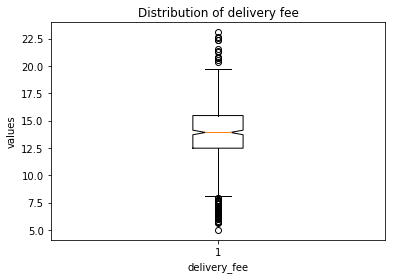

In [36]:
# make a box plot of deliveryfee
# extract the column of delivery fee
ls_fee = dt_out['delivery_fee']

plt.boxplot(ls_fee, notch=True)
plt.xlabel('delivery_fee')
plt.ylabel('values')
plt.title('Distribution of delivery fee')
plt.show()

#### use IQR to find outliers
In the following codes, **np.percentile** is used to find out the Q3 and Q1 for the data. The IQR is calculated with Q3-Q1 with result of 2.98. 

In [41]:
# get the IQR for delivery fee column
fee_q75, fee_q25= np.percentile(ls_fee, [75,25])
fee_iqr = fee_q75 - fee_q25
print('The IQR of delivery fee is ' + str(round(fee_iqr,2)) +'.')

The IQR of delivery fee is 2.98.


The upper bound is calculated with Q3+1.8 * IQR, $\$20.83$. The lower bound is calculated with Q1-1.8 * IQR, $\$7.12$. The calculated upper bound and lower bound are close to the observation of box plot.

In [42]:
# get upper and lower bound of data with IQR
fee_upper = fee_q75 + 1.8*fee_iqr
fee_lower = fee_q25 - 1.8*fee_iqr

print('The upper bound of delivery fee is $' + str(round(fee_upper,2)) + '.')
print('The upper bound of delivery fee is $' + str(round(fee_lower,2)) + '.')

The upper bound of delivery fee is $20.83.
The upper bound of delivery fee is $7.12.


The outlier_ls is counted to find the number of outliers. There are 33 outliers in data.

In [43]:
# count number of outliers
outlier_ls = [x for x in ls_fee if (x > fee_upper) or (x < fee_lower)]
print('There are ' + str(len(outlier_ls)) + ' outliers in delivery fee.')

There are 33 outliers in delivery fee.


Then the df.loc[ ] method is used to remove outliers. After removal of rows with outliers, there are 467 rows left in the dataframe

In [44]:
# drop outliers for the outlier dataframe
rm_outliers = dt_out.loc[(dt_out['delivery_fee']>fee_lower) & (dt_out['delivery_fee']<fee_upper)]
rm_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 499
Data columns (total 12 columns):
order_id                   467 non-null object
date                       467 non-null object
time                       467 non-null object
order_type                 467 non-null object
branch_code                467 non-null object
order_items                467 non-null object
order_price                467 non-null float64
customer_lat               467 non-null float64
customer_lon               467 non-null float64
customerHasloyalty?        467 non-null int64
distance_to_customer_KM    467 non-null float64
delivery_fee               467 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.4+ KB


In [45]:
## Generate output file
outlier_table = rm_outliers.to_csv('Group108_outlier_data_solution.csv', index=False)

### Deal with Group108_missing_data.csv

In [9]:
# make a copy of missing data table
ms_dt = dt3.copy()
ms_dt.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.00000,450.000000,450.000000
mean,499.336500,-37.812961,144.968684,0.04200,8.604602,13.878164
std,274.685483,0.007569,0.021694,0.20079,1.639868,2.499973
min,28.500000,-37.835050,144.917442,0.00000,3.120000,4.907230
25%,297.000000,-37.818983,144.953332,0.00000,7.787750,12.734456
50%,439.075000,-37.813609,144.965940,0.00000,8.734500,14.061863
75%,661.750000,-37.806604,144.983454,0.00000,9.626750,15.350906
max,1412.000000,-37.798509,145.020271,1.00000,13.206000,20.246519


In [10]:
ms_dt.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,400,500
unique,500,274,72,3,3,498
top,ORDY10642,2018-07-07,08:50:42,Dinner,NS,"[('Chicken', 9), ('Burger', 10)]"
freq,1,6,13,181,143,2


Missing value: distance_to_customer_KM(50), delivery_fee(50), branch_code(100)

In [11]:
ms_dt.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64

#### Fill up missing values in branch code 

In [12]:
# find the particular code used by each branch
ms_dt.insert(1,'branch_term',ms_dt['order_id'].str[3])
ms_dt.head(3)

,order_id,branch_term,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ05638,J,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207
1,ORDX05263,X,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180
2,ORDI00047,I,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882


Through groupby() function, it can be seen that each branch uses 3 unique code in there order id, where branch BK uses 'A', 'K', and 'X'; branck NS uses 'C', 'I', and 'Z'; branch TP uses 'B', 'J', and 'Y'.

In [13]:
# find the branch codes by grouping 
group_dt = ms_dt.groupby(['branch_code','branch_term']).sum()
group_dt

order_price  customer_lat  customer_lon  \
branch_code branch_term                                            
BK          A               20160.05  -1739.372843   6668.585897   
            K               15712.50  -1436.865484   5508.816392   
            X               24079.80  -1739.390016   6668.462240   
NS          C               28730.10  -1814.998104   6958.519718   
            I               24782.90  -1815.054545   6958.681752   
            Z               23061.95  -1777.271303   6813.554032   
TP          B               20432.80  -1625.931211   6233.528204   
            J               24273.70  -1739.476550   6668.601759   
            Y               17993.35  -1436.802997   5508.778935   

                         customerHasloyalty?  distance_to_customer_KM  \
branch_code branch_term                                                 
BK          A                              2                  341.649   
            K                              2                  282.488   
            X                              2                  358.525   
NS          C                              2                  422.921   
            I                              2                  427.407   
            Z                              0                  419.304   
TP          B                              4                  411.613   
            J                              2                  426.909   
            Y                              2                  360.816   

                         delivery_fee  
branch_code branch_term                
BK          A              540.085589  
            K              406.691557  
            X              621.883042  
NS          C              658.613714  
            I              596.274210  
            Z              596.632228  
TP          B              479.463405  
            J              527.857758  
            Y              413.166853

In [14]:
# select the columns to dealt 
list1 = ms_dt['branch_code']

# fill the nan with 0 for further use 
list1.fillna(0, inplace=True)

# show the first few lines after filling up
ms_dt.head()

,order_id,branch_term,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ05638,J,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207
1,ORDX05263,X,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180
2,ORDI00047,I,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882
3,ORDJ02135,J,2018-02-14,09:21:07,Breakfast,0,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,144.980613,0,NaN,11.166675
4,ORDC03650,C,2018-11-16,18:28:43,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,145.007679,0,10.530,16.608629


In [15]:
# fill nulls in branch code with correct values 
ms_dt['branch_code'].loc[((ms_dt['branch_term'] == 'B') | (ms_dt['branch_term'] == 'J') | (ms_dt['branch_term'] == 'Y'))&(ms_dt['branch_code']==0)] = 'TP'
ms_dt['branch_code'].loc[((ms_dt['branch_term'] == 'A') | (ms_dt['branch_term'] == 'K') | (ms_dt['branch_term'] == 'X'))&(ms_dt['branch_code']==0)] = 'BK'
ms_dt['branch_code'].loc[((ms_dt['branch_term'] == 'C') | (ms_dt['branch_term'] == 'I') | (ms_dt['branch_term'] == 'Z'))&(ms_dt['branch_code']==0)] = 'NS'


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
# drop the inserted column
ms_dt2 = ms_dt.drop(['branch_term'], axis=1)
ms_dt2.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ05638,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207
1,ORDX05263,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180
2,ORDI00047,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882
3,ORDJ02135,2018-02-14,09:21:07,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,144.980613,0,NaN,11.166675
4,ORDC03650,2018-11-16,18:28:43,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,145.007679,0,10.530,16.608629


In [17]:
# check if the nulls in this column still exist
ms_dt2.loc[ms_dt2['branch_code']==0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


#### Fill up missing values in distance to customers

To find out the distances from each branch to customers, the nodes of three branches needs to be figured out first. The branch.csv file is read as data frame. Then the nodes of branches can be found in the nodes data frame. 

In [18]:
nodes = pd.read_csv('nodes.csv')
nd_cp = nodes.copy().drop_duplicates('node')
nd_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17117 entries, 0 to 17116
Data columns (total 3 columns):
node    17117 non-null int64
lat     17117 non-null float64
lon     17117 non-null float64
dtypes: float64(2), int64(1)
memory usage: 534.9 KB


In [22]:
ed_cp = edges.copy()
ed_cp.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


Matching the branch code with data table to combine the branch latitude and longitude with corresponding branch code.

In [24]:
# read in branches
br = pd.read_csv('branches.csv')
# make a copy of branch file
br_cp = br.copy()
br_cp

,branch_code,branch_name,branch_lat,branch_lon
0,NS,Nickolson,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450


In [25]:
# merge branch information and missing data
ms_dt3 = pd.merge(ms_dt2, br_cp, left_on='branch_code', right_on='branch_code', how = 'left')

ms_dt3.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon
0,ORDJ05638,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207,Thompson,-37.861835,144.905716
1,ORDX05263,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180,Bakers,-37.815834,145.046450
2,ORDI00047,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882,Nickolson,-37.773803,144.983647
3,ORDJ02135,2018-02-14,09:21:07,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,144.980613,0,NaN,11.166675,Thompson,-37.861835,144.905716
4,ORDC03650,2018-11-16,18:28:43,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,145.007679,0,10.530,16.608629,Nickolson,-37.773803,144.983647


Merging the new table with node table to find nodes of customer location. 

In [26]:
# merge the new dataframe with branch-node merged dataframe 
ms_dt4 = pd.merge(ms_dt3, nd_cp,left_on=['customer_lat','customer_lon'], right_on=['lat','lon'],how = 'left').drop_duplicates('order_id')
#ms_dt4.info()
ms_dt4.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon
0,ORDJ05638,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207,Thompson,-37.861835,144.905716,247032409,-37.814080,144.973725
1,ORDX05263,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180,Bakers,-37.815834,145.046450,5668043850,-37.803007,145.017015
2,ORDI00047,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882,Nickolson,-37.773803,144.983647,252587628,-37.824548,144.988501
3,ORDJ02135,2018-02-14,09:21:07,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,144.980613,0,NaN,11.166675,Thompson,-37.861835,144.905716,6131956011,-37.825246,144.980613
4,ORDC03650,2018-11-16,18:28:43,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,145.007679,0,10.530,16.608629,Nickolson,-37.773803,144.983647,443530297,-37.814892,145.007679


In [27]:
# fill NaN with 0s for distance to customers
ms_dt4['distance_to_customer_KM'].fillna(0, inplace=True)
#ms_dt4.head()

Matching branch latitude and longitude with branch latitude and longitude, then the nodes of branches are obtained. The information of branch node is added into the dataframe to compare with customer nodes.

In [28]:
# get nodes for branches
br_nd = pd.merge(br_cp,nd_cp,left_on=['branch_lat','branch_lon'], right_on=['lat','lon'],how = 'left')
br_nd

,branch_code,branch_name,branch_lat,branch_lon,node,lat,lon
0,NS,Nickolson,-37.773803,144.983647,2455254505,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716,1390575046,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450,1889485053,-37.815834,145.046450


In [29]:
# create a new list to store the branch nodes 
ls_br = ms_dt4['branch_code']
ls_br_nd = []
node_ls = br_nd['node']

for i in range(len(ls_br)):
    if ls_br[i]=='NS':
        ls_br_nd.append(node_ls[0])
    elif ls_br[i]=='TP':
        ls_br_nd.append(node_ls[1])
    else:
        ls_br_nd.append(node_ls[2])


In [30]:
ls_br_nd

[1390575046,
 1889485053,
 2455254505,
 1390575046,
 2455254505,
 2455254505,
 1889485053,
 2455254505,
 2455254505,
 2455254505,
 1390575046,
 2455254505,
 1889485053,
 1390575046,
 2455254505,
 1889485053,
 1390575046,
 1889485053,
 1390575046,
 1390575046,
 2455254505,
 2455254505,
 1390575046,
 1390575046,
 1390575046,
 1390575046,
 1390575046,
 1889485053,
 1889485053,
 2455254505,
 1889485053,
 1889485053,
 2455254505,
 2455254505,
 1889485053,
 1889485053,
 1889485053,
 1390575046,
 2455254505,
 1889485053,
 1390575046,
 2455254505,
 2455254505,
 1390575046,
 1390575046,
 2455254505,
 1889485053,
 1889485053,
 1889485053,
 2455254505,
 2455254505,
 1390575046,
 1889485053,
 1390575046,
 1390575046,
 2455254505,
 2455254505,
 1390575046,
 1889485053,
 2455254505,
 2455254505,
 1889485053,
 2455254505,
 1390575046,
 1889485053,
 2455254505,
 2455254505,
 2455254505,
 1390575046,
 1889485053,
 2455254505,
 1390575046,
 1390575046,
 1390575046,
 2455254505,
 1889485053,
 1889485053,

In [31]:
# insert the branch node column
ms_dt4.insert(18,'branch_node',ls_br_nd)

In [32]:
ms_dt4.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node
0,ORDJ05638,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207,Thompson,-37.861835,144.905716,247032409,-37.814080,144.973725,1390575046
1,ORDX05263,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180,Bakers,-37.815834,145.046450,5668043850,-37.803007,145.017015,1889485053
2,ORDI00047,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882,Nickolson,-37.773803,144.983647,252587628,-37.824548,144.988501,2455254505
3,ORDJ02135,2018-02-14,09:21:07,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,144.980613,0,0.000,11.166675,Thompson,-37.861835,144.905716,6131956011,-37.825246,144.980613,1390575046
4,ORDC03650,2018-11-16,18:28:43,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,145.007679,0,10.530,16.608629,Nickolson,-37.773803,144.983647,443530297,-37.814892,145.007679,2455254505


The node and distance information is calculated with networkx package by the function single_source_dijkstra_path_length. A list of three dictionaries is created, where the first key-value pair is the node of the branch, while the other key-value pairs represents customer nodes and the shortest route to the branch. 

In [33]:
# genearte tuple list from edge file
ed_set = ed_cp[['u','v','distance(m)']]
ed_tups =[tuple(x) for x in ed_set.values]

In [64]:
ed_tups

[(711327755.0, 711332946.0, 58.0),
 (711327755.0, 55725841.0, 15.0),
 (711327755.0, 711327760.0, 165.0),
 (711327756.0, 703557073.0, 4.0),
 (711327756.0, 711332946.0, 8.0),
 (711327756.0, 711331420.0, 44.0),
 (711327759.0, 711331451.0, 8.0),
 (711327759.0, 703557072.0, 5.0),
 (711327759.0, 711331434.0, 32.0),
 (711327760.0, 603633283.0, 14.0),
 (711327760.0, 711331451.0, 59.0),
 (711327760.0, 711327755.0, 165.0),
 (777781264.0, 777781181.0, 14.0),
 (777781264.0, 387153082.0, 14.0),
 (711327758.0, 711334152.0, 7.0),
 (711327758.0, 277517039.0, 3.0),
 (164102232.0, 664379095.0, 33.0),
 (26476632.0, 242399609.0, 391.0),
 (26476632.0, 26476659.0, 156.0),
 (26476637.0, 1883787496.0, 290.0),
 (356125087.0, 356124993.0, 107.0),
 (356125087.0, 269327461.0, 97.0),
 (356125087.0, 356125211.0, 45.0),
 (26476659.0, 452327956.0, 368.0),
 (26476659.0, 26476642.0, 244.0),
 (123338879.0, 1201417396.0, 12.0),
 (123338879.0, 123351761.0, 70.0),
 (123338879.0, 949544827.0, 16.0),
 (560988348.0, 122765960

In [34]:
G=nx.Graph()
G.add_weighted_edges_from(ed_tups)


In [35]:
# generate dictioanry of customer nodes and distances
source = br_nd['node']
nd_dictLs = []
for x in range(len(source)):
    each = nx.single_source_dijkstra_path_length(G,source[x])
    nd_dictLs.append(each)

nd_dictLs

[{2455254505: 0,
  4973179170.0: 3998.0,
  4973179165.0: 4001.0,
  4973179167.0: 4002.0,
  3281126640.0: 4010.0,
  3281126649.0: 4028.0,
  3281126656.0: 4028.0,
  3281126642.0: 4046.0,
  4462665107.0: 4050.0,
  4462665105.0: 4068.0,
  2455200662.0: 4786.0,
  2417805512.0: 4793.0,
  2417805521.0: 4798.0,
  2451238134.0: 4837.0,
  2455223905.0: 4842.0,
  5421990708.0: 5377.0,
  5421990706.0: 5380.0,
  2451174795.0: 5638.0,
  131107628.0: 5661.0,
  2451176464.0: 5677.0,
  4271393505.0: 5692.0,
  2451176466.0: 5698.0,
  4271393504.0: 5708.0,
  4271393506.0: 5709.0,
  2451176465.0: 5714.0,
  307587086.0: 5720.0,
  4271393507.0: 5722.0,
  4271393503.0: 5739.0,
  307587089.0: 5755.0,
  2841675038.0: 6071.0,
  244222120.0: 6080.0,
  5096779233.0: 6081.0,
  244222123.0: 6090.0,
  233315059.0: 6095.0,
  938149791.0: 6107.0,
  370242273.0: 6108.0,
  244222119.0: 6113.0,
  767752170.0: 6114.0,
  244222121.0: 6115.0,
  331164104.0: 6126.0,
  4061250646.0: 6126.0,
  1367607235.0: 6129.0,
  509677923

In [36]:
ns_dict = nd_dictLs[0]
tp_dict = nd_dictLs[1]
bk_dict = nd_dictLs[2]

len(ns_dict)

17117

By checking the node and distance information in each node's dictionary, the missing distances is filled up with predicted data. 

In [37]:
for i in ms_dt4.index.values:
    key = ms_dt4.loc[i,'node']
    ms_dt4.loc[(ms_dt4['branch_code']=='NS')&(ms_dt4['distance_to_customer_KM']==0),'distance_to_customer_KM'] = (ns_dict[key])/1000
    ms_dt4.loc[(ms_dt4['branch_code']=='TP')&(ms_dt4['distance_to_customer_KM']==0),'distance_to_customer_KM'] = (tp_dict[key])/1000
    ms_dt4.loc[(ms_dt4['branch_code']=='BK')&(ms_dt4['distance_to_customer_KM']==0),'distance_to_customer_KM'] = (bk_dict[key])/1000

ms_dt4.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node
0,ORDJ05638,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207,Thompson,-37.861835,144.905716,247032409,-37.814080,144.973725,1390575046
1,ORDX05263,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180,Bakers,-37.815834,145.046450,5668043850,-37.803007,145.017015,1889485053
2,ORDI00047,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882,Nickolson,-37.773803,144.983647,252587628,-37.824548,144.988501,2455254505
3,ORDJ02135,2018-02-14,09:21:07,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,144.980613,0,8.550,11.166675,Thompson,-37.861835,144.905716,6131956011,-37.825246,144.980613,1390575046
4,ORDC03650,2018-11-16,18:28:43,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,145.007679,0,10.530,16.608629,Nickolson,-37.773803,144.983647,443530297,-37.814892,145.007679,2455254505


#### Fill up missing valuse in delivery_fee
In this section, the delivery fee is predicted with linear regression models. The models are built regarding different branches. 

####  - Prepare data for building up linear models
Similar to the delivery models in dirty data section, extra columns are inserted into the missing data table for building up models. Here, NaNs are filled with -1 for convenience of iteration. 

In [38]:
# fill the NaN with -1
ms_dt4['delivery_fee'].fillna(-1,inplace=True)
ms_dt4.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node
0,ORDJ05638,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207,Thompson,-37.861835,144.905716,247032409,-37.814080,144.973725,1390575046
1,ORDX05263,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180,Bakers,-37.815834,145.046450,5668043850,-37.803007,145.017015,1889485053
2,ORDI00047,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882,Nickolson,-37.773803,144.983647,252587628,-37.824548,144.988501,2455254505
3,ORDJ02135,2018-02-14,09:21:07,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,144.980613,0,8.550,11.166675,Thompson,-37.861835,144.905716,6131956011,-37.825246,144.980613,1390575046
4,ORDC03650,2018-11-16,18:28:43,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,145.007679,0,10.530,16.608629,Nickolson,-37.773803,144.983647,443530297,-37.814892,145.007679,2455254505


In [39]:
#add a column to find day of week for the dates
weekd = pd.to_datetime(ms_dt4['date']).dt.day_name()
ms_dt4.insert(3, 'day_of_Week', weekd)
ms_dt4.head()

,order_id,date,time,day_of_Week,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node
0,ORDJ05638,2018-09-16,16:37:10,Sunday,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,144.973725,0,8.550,14.463207,Thompson,-37.861835,144.905716,247032409,-37.814080,144.973725,1390575046
1,ORDX05263,2018-09-27,16:57:27,Thursday,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,145.017015,0,5.888,12.743180,Bakers,-37.815834,145.046450,5668043850,-37.803007,145.017015,1889485053
2,ORDI00047,2018-02-05,09:10:59,Monday,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,144.988501,0,9.629,14.386882,Nickolson,-37.773803,144.983647,252587628,-37.824548,144.988501,2455254505
3,ORDJ02135,2018-02-14,09:21:07,Wednesday,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,144.980613,0,8.550,11.166675,Thompson,-37.861835,144.905716,6131956011,-37.825246,144.980613,1390575046
4,ORDC03650,2018-11-16,18:28:43,Friday,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,145.007679,0,10.530,16.608629,Nickolson,-37.773803,144.983647,443530297,-37.814892,145.007679,2455254505


In [40]:
# insert a column of weekday or weekend judgement
ls2 = ms_dt4['day_of_Week']
ls_wd = []


for i in range(len(ls2)):
    if ls2[i]=='Saturday' or ls2[i]=='Sunday':
        ls_wd.append(1)
    else:
        ls_wd.append(0)

ms_dt4.insert(4,'Week_days', ls_wd)
ms_dt4.head()

,order_id,date,time,day_of_Week,Week_days,order_type,branch_code,order_items,order_price,customer_lat,...,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node
0,ORDJ05638,2018-09-16,16:37:10,Sunday,1,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,-37.814080,...,0,8.550,14.463207,Thompson,-37.861835,144.905716,247032409,-37.814080,144.973725,1390575046
1,ORDX05263,2018-09-27,16:57:27,Thursday,0,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,-37.803007,...,0,5.888,12.743180,Bakers,-37.815834,145.046450,5668043850,-37.803007,145.017015,1889485053
2,ORDI00047,2018-02-05,09:10:59,Monday,0,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,-37.824548,...,0,9.629,14.386882,Nickolson,-37.773803,144.983647,252587628,-37.824548,144.988501,2455254505
3,ORDJ02135,2018-02-14,09:21:07,Wednesday,0,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,-37.825246,...,0,8.550,11.166675,Thompson,-37.861835,144.905716,6131956011,-37.825246,144.980613,1390575046
4,ORDC03650,2018-11-16,18:28:43,Friday,0,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,-37.814892,...,0,10.530,16.608629,Nickolson,-37.773803,144.983647,443530297,-37.814892,145.007679,2455254505


In [41]:
# insert a column of meal type judgement
ls3 = ms_dt4['order_type']
ls_time = []

for i in range(len(ls3)):
    if ls3[i]=='Breakfast':
        ls_time.append(0)
    elif ls3[i]=='Lunch': 
        ls_time.append(1)
    else:
        ls_time.append(2)

ms_dt4.insert(6,'time_type', ls_time)
ms_dt4.head()

,order_id,date,time,day_of_Week,Week_days,order_type,time_type,branch_code,order_items,order_price,...,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node
0,ORDJ05638,2018-09-16,16:37:10,Sunday,1,Dinner,2,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,...,0,8.550,14.463207,Thompson,-37.861835,144.905716,247032409,-37.814080,144.973725,1390575046
1,ORDX05263,2018-09-27,16:57:27,Thursday,0,Dinner,2,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,...,0,5.888,12.743180,Bakers,-37.815834,145.046450,5668043850,-37.803007,145.017015,1889485053
2,ORDI00047,2018-02-05,09:10:59,Monday,0,Breakfast,0,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,...,0,9.629,14.386882,Nickolson,-37.773803,144.983647,252587628,-37.824548,144.988501,2455254505
3,ORDJ02135,2018-02-14,09:21:07,Wednesday,0,Breakfast,0,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,...,0,8.550,11.166675,Thompson,-37.861835,144.905716,6131956011,-37.825246,144.980613,1390575046
4,ORDC03650,2018-11-16,18:28:43,Friday,0,Dinner,2,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,...,0,10.530,16.608629,Nickolson,-37.773803,144.983647,443530297,-37.814892,145.007679,2455254505


In [42]:
# select data for linear regression
# subset for training
sub_train = ms_dt4.loc[ms_dt4['delivery_fee']!=-1]
# sub_train.describe()

In [43]:
# subset for predict
sub_pred = ms_dt4.loc[ms_dt4['delivery_fee']==-1]
# sub_pred.describe()

In [44]:
# initiate linear regression
lm = LinearRegression()

As shown below, data of each branch is selected with all the effective data used as training set. Variables considered are the same set as in dirty data part. 

In this part, the R^2 of delivery fee are calculated. The values of R^2 are 0.8742462131198474, 0.7179002344086023, and 0.9306500394759474.

#### Fill missing values for NS branch 

In [45]:
# build model for NS branch 
# filter dataset for NS branch
ns_nm_fit = sub_train.loc[sub_train['branch_code']=='NS']

# multiply the fee for customers with loyalty by 2 
ns_nm_fit['delivery_fee'] = np.where(ns_nm_fit['customerHasloyalty?'] == 1, ns_nm_fit['delivery_fee']*2, ns_nm_fit['delivery_fee'])


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
# find variables to fit models
ns_x_train = ns_nm_fit[[x for x in ns_nm_fit.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]
ns_y_train = ns_nm_fit['delivery_fee']

# fit the data for NS branch
lm.fit(ns_x_train,ns_y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Find R square for the linear model
print ('r-squared for this model = ',lm.score(ns_x_train,ns_y_train))

r-squared for this model =  0.8742462131198474


In [48]:
# select data to be predicted with
ns_toPred = sub_pred.loc[sub_pred['branch_code']=='NS']
ns_x_pred = ns_toPred[[x for x in ns_toPred.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]

# predict the data to fill for null
ns_y_pred = lm.predict(ns_x_pred)

# find line index of empty values in delivery fee of NS branch
ind_ns = ms_dt4[(ms_dt4['branch_code']=='NS') & (ms_dt4['delivery_fee']==-1)].index.tolist()

# get list of all values in delivery fee
to_fi_ns = ms_dt4['delivery_fee']  

# match line index with index of value of missing values 
j = 0
for i in ind_ns:
    if ms_dt4.loc[i,'customerHasloyalty?']==1:
        ms_dt4.loc[i,'delivery_fee'] = (ns_y_pred[j])/2
    else:
        ms_dt4.loc[i,'delivery_fee'] = ns_y_pred[j]
    j+=1


In [49]:
# check if the nulls are filled up
ms_dt4.loc[(ms_dt4['branch_code']=='NS') & (ms_dt4['delivery_fee']==-1)]

,order_id,date,time,day_of_Week,Week_days,order_type,time_type,branch_code,order_items,order_price,...,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node


#### Fill missing values for TP branch 

In [50]:
# build model for TP branch 
# filter dataset for TP branch
tp_nm_fit = sub_train.loc[sub_train['branch_code']=='TP']

# multiply the fee for customers with loyalty by 2 
tp_nm_fit['delivery_fee'] = np.where(tp_nm_fit['customerHasloyalty?'] == 1, tp_nm_fit['delivery_fee']*2, tp_nm_fit['delivery_fee'])


tp_x_train = tp_nm_fit[[x for x in tp_nm_fit.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]
tp_y_train = tp_nm_fit['delivery_fee']

# fit the data for TP branch
lm.fit(tp_x_train,tp_y_train) 


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# Find R square for the linear model
print ('r-squared for this model = ',lm.score(tp_x_train,tp_y_train))

r-squared for this model =  0.7179002344086023


In [52]:
# select data to be predicted with
tp_toPred = sub_pred.loc[sub_pred['branch_code']=='TP']
tp_x_pred = tp_toPred[[x for x in tp_toPred.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]

# predict the data to fill for null
tp_y_pred = lm.predict(tp_x_pred)


In [53]:
# find line index of empty values in delivery fee of NS branch
ind_tp = ms_dt4[(ms_dt4['branch_code']=='TP') & (ms_dt4['delivery_fee']==-1)].index.tolist()

# get list of all values in delivery fee
to_fi_tp = ms_dt4['delivery_fee']  

# match line index with index of value of missing values 
j = 0
for i in ind_tp:
    if ms_dt4.loc[i,'customerHasloyalty?']==1:
        ms_dt4.loc[i,'delivery_fee'] = (tp_y_pred[j])/2
    else:
        ms_dt4.loc[i,'delivery_fee'] = tp_y_pred[j]
    j+=1


In [54]:
# check if the nulls are filled up
ms_dt4.loc[(ms_dt4['branch_code']=='TP') & (ms_dt4['delivery_fee']==-1)]

,order_id,date,time,day_of_Week,Week_days,order_type,time_type,branch_code,order_items,order_price,...,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node


#### Fill missing values for BK branch 

In [55]:
# build model for BK branch 
# filter dataset for BK branch
bk_nm_fit = sub_train.loc[sub_train['branch_code']=='BK']

# multiply the fee for customers with loyalty by 2 
bk_nm_fit['delivery_fee'] = np.where(bk_nm_fit['customerHasloyalty?'] == 1, bk_nm_fit['delivery_fee']*2, bk_nm_fit['delivery_fee'])


bk_x_train = bk_nm_fit[[x for x in bk_nm_fit.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'distance_to_customer_KM')]]
bk_y_train = bk_nm_fit['delivery_fee']

# fit the data for BK branch
lm.fit(bk_x_train,bk_y_train) 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# Find R square for the linear model
print ('r-squared for this model = ',lm.score(bk_x_train,bk_y_train))

r-squared for this model =  0.9306500394759474


In [57]:
# select data to be predicted with
bk_toPred = sub_pred.loc[sub_pred['branch_code']=='BK']
bk_x_pred = bk_toPred[[x for x in bk_toPred.columns if (x == 'Week_days') or (x == 'time_type') or (x == 'customerHasloyalty?')]]

# predict the data to fill for null
bk_y_pred = lm.predict(bk_x_pred)


In [58]:
# find line index of empty values in delivery fee of BK branch
ind_bk = ms_dt4[(ms_dt4['branch_code']=='BK') & (ms_dt4['delivery_fee']==-1)].index.tolist()

# get list of all values in delivery fee
to_fi_bk = ms_dt4['delivery_fee']  

# match line index with index of value of missing values 
j = 0
for i in ind_bk:
    if ms_dt4.loc[i,'customerHasloyalty?'] == 1:
        ms_dt4.loc[i,'delivery_fee'] = (bk_y_pred[j])/2
    else:
        ms_dt4.loc[i,'delivery_fee'] = bk_y_pred[j]
    j+=1


In [59]:
# check if the nulls are filled up
ms_dt4.loc[(ms_dt4['branch_code']=='BK') & (ms_dt4['delivery_fee']==-1)]

,order_id,date,time,day_of_Week,Week_days,order_type,time_type,branch_code,order_items,order_price,...,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node


#### Remove extra columns from the dataframe

In [60]:
ms_dt4.head()

,order_id,date,time,day_of_Week,Week_days,order_type,time_type,branch_code,order_items,order_price,...,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_name,branch_lat,branch_lon,node,lat,lon,branch_node
0,ORDJ05638,2018-09-16,16:37:10,Sunday,1,Dinner,2,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.5,...,0,8.550,14.463207,Thompson,-37.861835,144.905716,247032409,-37.814080,144.973725,1390575046
1,ORDX05263,2018-09-27,16:57:27,Thursday,0,Dinner,2,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.0,...,0,5.888,12.743180,Bakers,-37.815834,145.046450,5668043850,-37.803007,145.017015,1889485053
2,ORDI00047,2018-02-05,09:10:59,Monday,0,Breakfast,0,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.0,...,0,9.629,14.386882,Nickolson,-37.773803,144.983647,252587628,-37.824548,144.988501,2455254505
3,ORDJ02135,2018-02-14,09:21:07,Wednesday,0,Breakfast,0,TP,"[('Cereal', 9), ('Pancake', 8)]",383.0,...,0,8.550,11.166675,Thompson,-37.861835,144.905716,6131956011,-37.825246,144.980613,1390575046
4,ORDC03650,2018-11-16,18:28:43,Friday,0,Dinner,2,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.0,...,0,10.530,16.608629,Nickolson,-37.773803,144.983647,443530297,-37.814892,145.007679,2455254505


In [61]:
# remove unnecessary columns
output1 = ms_dt4.drop(['day_of_Week','Week_days','time_type'],axis=1)


In [62]:
# select wanted columns for output
sel_out = output1.iloc[:,0:12]
sel_out

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ05638,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 3), ('Salmon', 7)]",474.50,-37.814080,144.973725,0,8.550,14.463207
1,ORDX05263,2018-09-27,16:57:27,Dinner,BK,"[('Shrimp', 1), ('Salmon', 3), ('Pasta', 8)]",397.00,-37.803007,145.017015,0,5.888,12.743180
2,ORDI00047,2018-02-05,09:10:59,Breakfast,NS,"[('Cereal', 8), ('Pancake', 8), ('Coffee', 6)]",407.00,-37.824548,144.988501,0,9.629,14.386882
3,ORDJ02135,2018-02-14,09:21:07,Breakfast,TP,"[('Cereal', 9), ('Pancake', 8)]",383.00,-37.825246,144.980613,0,8.550,11.166675
4,ORDC03650,2018-11-16,18:28:43,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 5)]",285.00,-37.814892,145.007679,0,10.530,16.608629
5,ORDI03344,2018-03-07,10:01:41,Breakfast,NS,"[('Eggs', 5), ('Pancake', 6), ('Coffee', 10), ...",456.50,-37.821765,144.952267,0,9.623,14.096195
6,ORDA09208,2018-09-09,16:16:54,Dinner,BK,"[('Shrimp', 7), ('Pasta', 5), ('Fish&Chips', 8...",1041.50,-37.809390,144.989200,0,5.101,14.265163
7,ORDI05531,2018-12-16,19:29:34,Dinner,NS,"[('Shrimp', 6), ('Pasta', 4), ('Salmon', 1)]",475.00,-37.813484,144.965643,0,7.841,15.294037
8,ORDI00839,2018-11-28,18:59:09,Dinner,NS,"[('Fish&Chips', 5), ('Pasta', 8)]",395.00,-37.820467,144.966331,0,8.869,15.081498
9,ORDZ10317,2018-04-12,11:12:40,Breakfast,NS,"[('Cereal', 1), ('Pancake', 10)]",263.50,-37.814030,144.962640,0,8.081,13.106176


#### Convert the dataframe to ouput csv file

In [63]:
mss_out = sel_out.to_csv('Group108_missing_data_solution.csv',index=False)